<a href="https://colab.research.google.com/github/Marcos-Sanson/UC3M-Web-Analytics/blob/main/Data_Visualization_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB ANALYTICS – Data Science and Engineering Degree  
## *(1st Semester, 4th-Year-Level Course)*  

### Data Visualization in the Web  

This lab was part of my **Web Analytics** course at **Universidad Carlos III de Madrid (UC3M)**, where I studied abroad from **September 2024 to December 2024** as part of my Computer Science degree. This specific lab focused on **data visualization techniques** for web analytics, using **Python (Pandas, Matplotlib, Seaborn, and Folium)** and **Google Data Studio** to analyze and visualize datasets from the **Instituto Nacional de Estadística (INE)**.  

Working in a group of three students for this lab, we processed and visualized data related to the **tourism sector in Spain**, focusing on historical travel data and employment in tourism. Our tasks included **data cleaning, transformation, and visualization** using **Python and various data visualization libraries**.  

### **Lab 1: Data Processing and Visualization in Python**  
We began by loading datasets related to **tourism and employment** from the INE. Our preprocessing involved:  
- Splitting **time-based columns** (e.g., extracting Year and Quarter from date strings).  
- Converting numerical values stored as text into **numeric formats** for analysis.  
- Extracting **Autonomous Community (CCAA) codes** for regional analysis.  
- Filtering data to focus on **tourism activities and employment in specific industries** (e.g., hospitality, transport).  

After preprocessing, we created **visualizations using Matplotlib and Seaborn**, including:  
- **Bar charts** showing employment in the tourism sector by **CNAE activity code**, split by gender and year.  
- **Box plots** depicting the **distribution of tourists per Autonomous Community (CCAA)** over time.  
- **Line charts** tracking variations in the number of tourists over time based on the **reason for travel**.  
- **Time series graphs** illustrating total and average **tourism expenses per CCAA** for both local and external trips.  

We also developed an **interactive choropleth map** using **Folium**, visualizing the **number of trips, expenses, and average trip duration per CCAA for 2021**. The map integrated **GeoJSON boundary data** to accurately represent regional statistics.  

### **Lab 2: Google Data Studio**  
For the second part of the lab, we used **Google Data Studio** to build an **interactive dashboard** using the processed datasets. Our dashboard included:  
- A **highlight box** displaying total tourism statistics.  
- A **time series chart** tracking trends in travel and employment.  
- A **pie chart** showing the distribution of tourism types.  
- A **bar chart** illustrating employment in the tourism sector.  
- A **summary table** aggregating key statistics.  
- A **map visualization** representing data by CCAA.  

We focused on **creating an intuitive and visually engaging dashboard** so that key trends were easily interpretable. The lab concluded with the submission of our **Data Studio dashboard** along with a report explaining our design choices and data transformations.  

### **Outcome**  
Through this lab, we gained experience in **data preprocessing, visualization, and storytelling** using **Python and Google Data Studio**. We also improved our ability to **analyze real-world datasets**, extract details from large-scale tourism data, and communicate findings effectively through **visualizations**.

In this section we will use data from the *Instituto Nacional de Estadística* [INE](https://www.ine.es/index.htm). We will be focus on the Tourism Sector.

We are going to analyze the tourism from two points of view. On the one hand, we are going to use the data that give us information on the history of travel in Spain. On the other hand, we will analyze employment in the tourism sector. You can visit the INE website for more information about the datasets. But in this [folder](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing) you can find the files that we will use in the labs.

# Lab1: Data Processing and Visualization in Python

## 0. Lab Preparation

1.  Study and have understood the concepts explained in the theoretical class and the introductory lab.

2.   Gain experience with the use of the [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) and/or [Seaborn](https://seaborn.pydata.org/) and [Folium](https://python-visualization.github.io/folium/). The exercises of this lab will be mainly based on the utilization of functions offered by these libraries for data cleaning and data processing.

3. It is assumed students have experience in using Python notebooks. Either a local installation (e.g., local python installation + Jupyter) or a cloud-based solution (e.g., Google Colab). *We recommend the second option*.

## 1. Lab Introduction

* In this lab, we will prepare our dataset for later analysis and visualization using [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) and/or [Seaborn](https://seaborn.pydata.org/) and [Folium](https://python-visualization.github.io/folium/).

* The lab will be done in groups of 3 people.

* The lab defines a set of milestones the students must complete. Upon completing every milestone, students should call the professor, who will check the correctness of the solution (*If the professor is busy, do not wait for them, move to the next milestone*).

* **The final mark will be computed as a function of the number of milestones successfully completed.**

* **Each group should also share their lab notebook with the professor upon the finalization of the lab.**

- It is recommended to use [Google Colab](https://colab.research.google.com/) to produce the Python notebook with the solution of the lab. Of course, if any student prefers using its local programming environment (e.g., jupyter) and python installation, they are welcome to do so.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Milestone 1

1. Load the datasets about tourism ([INE_tourism](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing)) into dataframes
2. Prepare the data for later analysis, that is:
  * Split the column *Periodo* in *Year* and *Quarter* or *Month*.
  * Transform column numbers that are identified as Objects by Python to numbers. (Print *dtypes* of your dataframes to check it is done correctly).
  * Extract the Autonomous Community (CCAA) from the corresponding column.
  



In [2]:
%cd ./drive/MyDrive/Web Analytics/INE

/content/drive/MyDrive/Web Analytics/INE


In [3]:
import pandas as pd

# --- Load datasets ---
# Load data from CSV files using tab-separated values (`sep='\t'` specifies tab delimiter)
# Each file represents different aspects of tourism data, organized by various attributes
tourism1 = pd.read_csv(
    'INE_tourism/Número de turistas según comunidad autónoma de destino principal.csv', sep='\t')
tourism2 = pd.read_csv(
    'INE_tourism/Número de turistas según motivo principal del viaje.csv', sep='\t')
tourism3 = pd.read_csv(
    'INE_tourism/Viajes con destino principal interno, pernoctaciones, duración media y gasto por tipo de destino principal, según comunidad autónoma de residencia de los viajeros.csv', sep='\t')
tourism4 = pd.read_csv(
    'INE_tourism/Viajes, pernoctaciones, duración media y gasto por comunidad autónoma de residencia de los viajeros.csv', sep='\t')

# Print the first 5 rows of tourism4 dataset to understand the structure of the data
print(tourism4.head())

# --- Point 1: Split 'Periodo' column into 'Year' and 'Quarter' or 'Year' and 'Month' ---
# The 'Periodo' column represents time periods in different formats:
# - "YYYYTQ" (e.g., "2021T3") for quarters
# - "YYYYMM" (e.g., "2021M09") for months

# Extract 'Year' (first 4 digits) and 'Quarter' (digit after "T") for quarterly data
# r'(\d{4})T(\d)' means:
# - `\d{4}`: Matches exactly 4 digits (the year)
# - `T`: Matches the character 'T' literally
# - `\d`: Matches a single digit (the quarter number)
tourism4[['Year', 'Quarter']] = tourism4['Periodo'].str.extract(r'(\d{4})T(\d)')
tourism3[['Year', 'Quarter']] = tourism3['Periodo'].str.extract(r'(\d{4})T(\d)')

# Extract 'Year' (first 4 digits) and 'Month' (2 digits after "M") for monthly data
# r'(\d{4})M(\d{2})' means:
# - `\d{4}`: Matches exactly 4 digits (the year)
# - `M`: Matches the character 'M' literally
# - `\d{2}`: Matches exactly 2 digits (the month number)
tourism2[['Year', 'Month']] = tourism2['Periodo'].str.extract(r'(\d{4})M(\d{2})')
tourism1[['Year', 'Month']] = tourism1['Periodo'].str.extract(r'(\d{4})M(\d{2})')

# --- Point 2: Clean and convert 'Total' column values to numeric ---
# Define a reusable function to clean and convert numerical columns
def clean_and_convert_to_numeric(df, column):
    # Replace periods (used as thousand separators in some locales) with nothing
    df[column] = df[column].str.replace('.', '', regex=False)
    # Replace commas (used as decimal points in some locales) with dots
    df[column] = df[column].str.replace(',', '.', regex=False)

    # Convert the cleaned column to numeric, coercing invalid entries into NaN
    # `errors='coerce'` ensures that non-convertible values are replaced with NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

# Apply the cleaning function to the 'Total' column for each dataset
tourism1 = clean_and_convert_to_numeric(tourism1, 'Total')
tourism2 = clean_and_convert_to_numeric(tourism2, 'Total')
tourism3 = clean_and_convert_to_numeric(tourism3, 'Total')
tourism4 = clean_and_convert_to_numeric(tourism4, 'Total')

# Print the first 5 rows of tourism4 again to confirm successful cleaning
print(tourism4.head())

# --- Point 3: Extract Autonomous Community (CCAA) codes ---
# Assume CCAA codes are the first two digits in specific columns
# Use regex to extract these codes
# r'^(\d{2})' means:
# - `^`: Start of the string
# - `\d{2}`: Matches exactly 2 digits (the code for the autonomous community)

# Extract CCAA codes from the 'Comunidades autónomas' column in tourism1
tourism1['CCAA'] = tourism1['Comunidades autónomas'].str.extract(r'^(\d{2})')

# Extract CCAA codes from the 'Comunidad autónoma de residencia' column in tourism3 and tourism4
tourism3['CCAA'] = tourism3['Comunidad autónoma de residencia'].str.extract(r'^(\d{2})')
tourism4['CCAA'] = tourism4['Comunidad autónoma de residencia'].str.extract(r'^(\d{2})')

# Print the tourism3 dataset to inspect the new 'CCAA' column
print(tourism3)


  Comunidad autónoma de residencia Concepto turístico    Tipo de dato Periodo  \
0                            Total             Viajes  Valor absoluto  2021T2   
1                            Total             Viajes  Valor absoluto  2021T1   
2                            Total             Viajes  Valor absoluto  2020T4   
3                            Total             Viajes  Valor absoluto  2020T3   
4                            Total             Viajes  Valor absoluto  2020T2   

        Total  
0  34.293.875  
1  15.220.538  
2  17.188.061  
3  46.136.493  
4   9.027.260  
  Comunidad autónoma de residencia Concepto turístico    Tipo de dato Periodo  \
0                            Total             Viajes  Valor absoluto  2021T2   
1                            Total             Viajes  Valor absoluto  2021T1   
2                            Total             Viajes  Valor absoluto  2020T4   
3                            Total             Viajes  Valor absoluto  2020T3   
4           

## Milestone 2

1. Load the datasets about employment ([INE_employment](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing)) into dataframes
2. Prepare the data for later analysis, that is:
  * Split the column *Periodo* in *Year* and *Quarter* or *Month*.
  * Transform column numbers that are identified as Objects by Python to numbers. (Print *dtypes* of your dataframes to check it is done correctly).
  * Extract the Autonomous Community (CCAA) from the corresponding column.
  * From the "Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo" file:
    * Extract CNAE Code from column *Rama de actividad CNAE 2009* (you must regular expressions).
    * Filter the dataframe to obtain the rows with CNAE Codes: 49, 50, 51, 52, 55, 56, 77, 79, 90, 91, 93.
  * From the "Ocupados por rama de actividad, sexo y comunidad autónoma" file:
    * Filter the dataframe to obtain only the rows with the following activities (*Rama de actividad CNAE 2009*):
      * G + H + I
      * M + N
      * R + S + T + U



In [4]:
# Define a reusable function to clean and convert numerical columns
def clean_and_convert_to_numeric(df, column):
    # Remove periods (thousand separators) and replace commas with dots for decimal conversion
    df[column] = df[column].str.replace('.', '', regex=False)
    df[column] = df[column].str.replace(',', '.', regex=False)
    # Convert the column to numeric, coercing invalid parsing into NaN
    return pd.to_numeric(df[column], errors='coerce')

# --- Step 1: Load datasets ---
# Load employment datasets with tab-separated values
employment1 = pd.read_csv(
    'INE_employment/Ocupados por rama de actividad, sexo y comunidad autónoma.csv', sep='\t')
employment2 = pd.read_csv(
    'INE_employment/Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo.csv', sep='\t')

# --- Step 2: Split 'Periodo' into 'Year' and 'Quarter' ---
# Extract 'Year' and 'Quarter' from the 'Periodo' column using regular expressions
employment1[['Year', 'Quarter']] = employment1['Periodo'].str.extract(r'(\d{4})T(\d)')
employment2[['Year', 'Quarter']] = employment2['Periodo'].str.extract(r'(\d{4})T(\d)')

# --- Step 3: Convert 'Total' column to numeric ---
# Apply the cleaning and conversion function to the 'Total' column
employment1['Total'] = clean_and_convert_to_numeric(employment1, 'Total')
employment2['Total'] = clean_and_convert_to_numeric(employment2, 'Total')

# --- Step 4: Extract Autonomous Community (CCAA) Codes ---
# Extract CCAA codes (first two digits) from the relevant column
employment1['CCAA'] = employment1['Comunidades y Ciudades Autónomas'].str.extract(r'^(\d{2})')

# --- Step 5: Extract CNAE Code and Activity Name from 'Rama de actividad CNAE 2009' in employment2 ---
# Extract the CNAE code (first two digits) and the corresponding activity string (text) from 'Rama de actividad CNAE 2009'
employment2[['CNAE', 'Activity_Name']] = employment2['Rama de actividad CNAE 2009'].str.extract(r'(\d{2})\s*(.*)')

# Filter employment2 for specific CNAE codes
target_cnae_codes = ['49', '50', '51', '52', '55', '56', '77', '79', '90', '91', '93']
filtered_employment2 = employment2[employment2['CNAE'].isin(target_cnae_codes)]

# --- Step 6: Filter employment1 for specific activities in 'Rama de actividad CNAE 2009' ---
# Filter rows that contain specific activity groups (G + H + I, M + N, R + S + T + U)
filtered_employment1 = employment1[
    employment1['Rama de actividad CNAE 2009'].str.contains(r"G\s*\+\s*H\s*\+\s*I", regex=True) |
    employment1['Rama de actividad CNAE 2009'].str.contains(r"M\s*\+\s*N", regex=True) |
    employment1['Rama de actividad CNAE 2009'].str.contains(r"R\s*\+\s*S\s*\+\s*T\s*\+\s*U", regex=True)
]

# --- Step 7: Print results to validate ---
# Print the filtered employment2 dataset for selected CNAE codes along with the activity name
print(filtered_employment2[['CNAE', 'Activity_Name', 'Total', 'Year', 'Quarter']])

# Print the filtered employment1 dataset for selected activity groups
print(filtered_employment1[['CCAA', 'Rama de actividad CNAE 2009', 'Total', 'Year', 'Quarter']])


      CNAE                                      Activity_Name  Total  Year  \
17160   49                 Transporte terrestre y por tubería  544.2  2021   
17161   49                 Transporte terrestre y por tubería  557.0  2021   
17162   49                 Transporte terrestre y por tubería  582.6  2021   
17163   49                 Transporte terrestre y por tubería  575.4  2020   
17164   49                 Transporte terrestre y por tubería  546.9  2020   
...    ...                                                ...    ...   ...   
33325   93  Actividades deportivas, recreativas y de entre...    0.7  2009   
33326   93  Actividades deportivas, recreativas y de entre...    0.9  2008   
33327   93  Actividades deportivas, recreativas y de entre...    0.9  2008   
33328   93  Actividades deportivas, recreativas y de entre...    0.7  2008   
33329   93  Actividades deportivas, recreativas y de entre...    0.6  2008   

      Quarter  
17160       3  
17161       2  
17162       1  

## Milestone 3

Now, we will visualize our pre-processed datasets using [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). You can choose one or both libraries for this milestones.  

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

1. Plot a bar graph of employed people in the toursim sector by activity (CNAE codes selected above) for both sexs, in absolute values and splitted by years.
2. Plot a bar graph of employed people in the toursim sector by year, sex and CCAA.
3. Plot a boxplot graph containing the distribution of the number of tourists by year per CCAA.
  

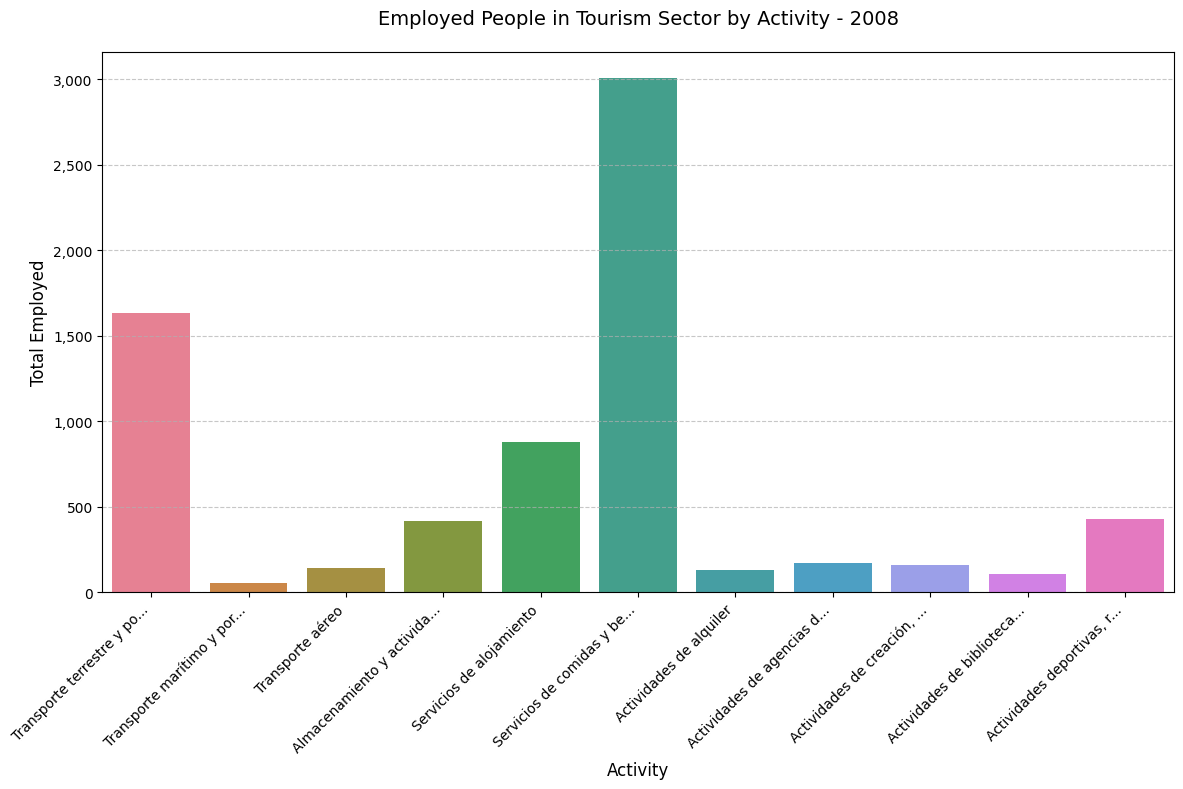

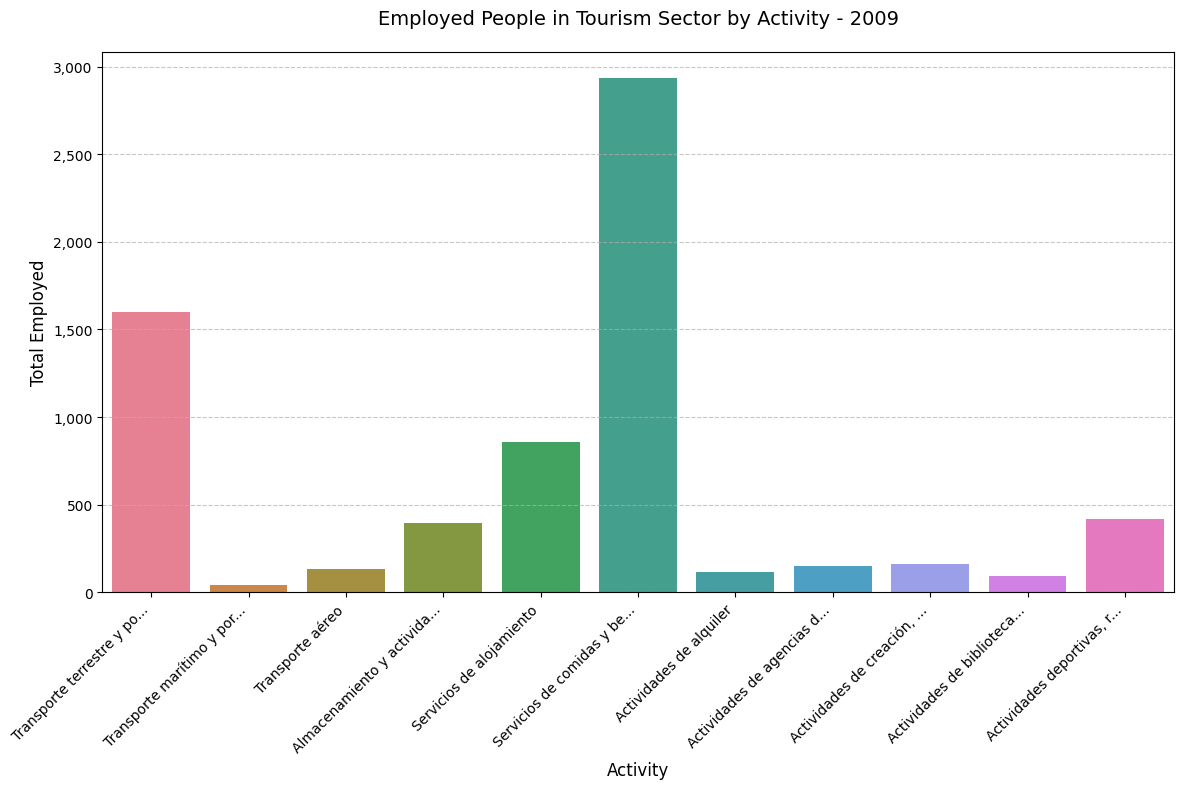

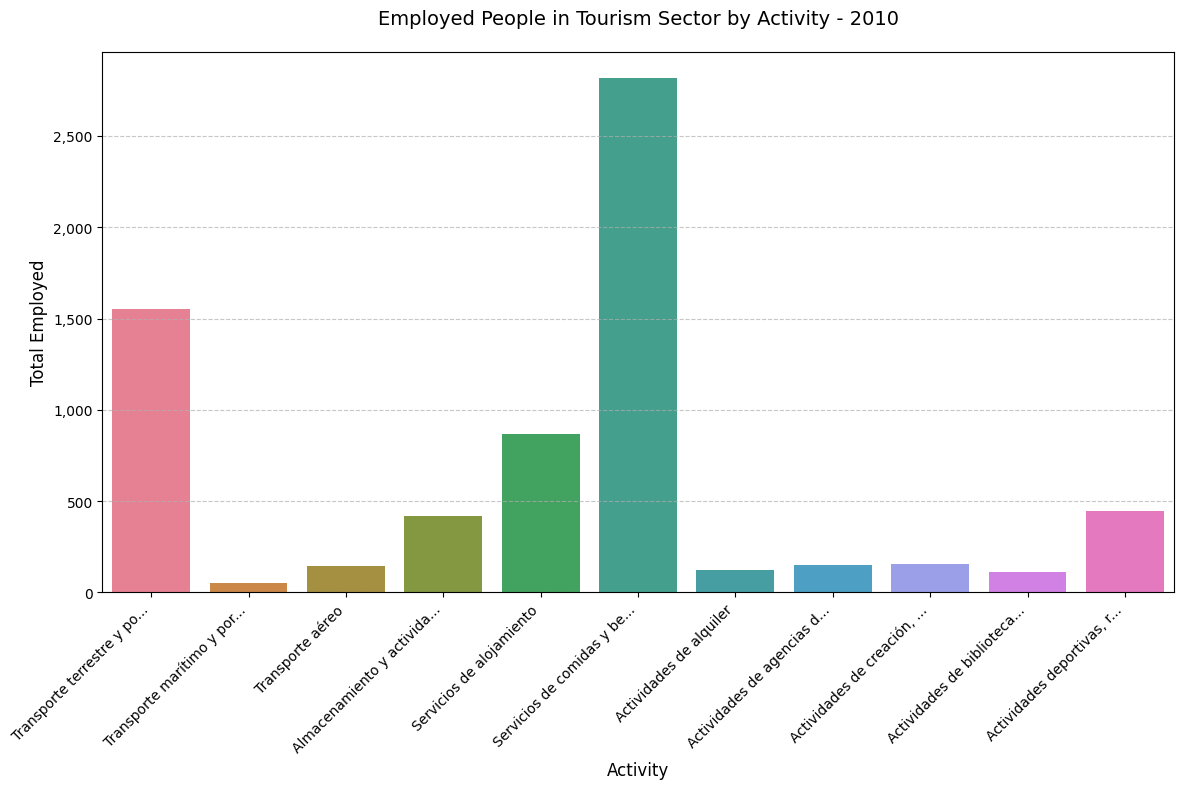

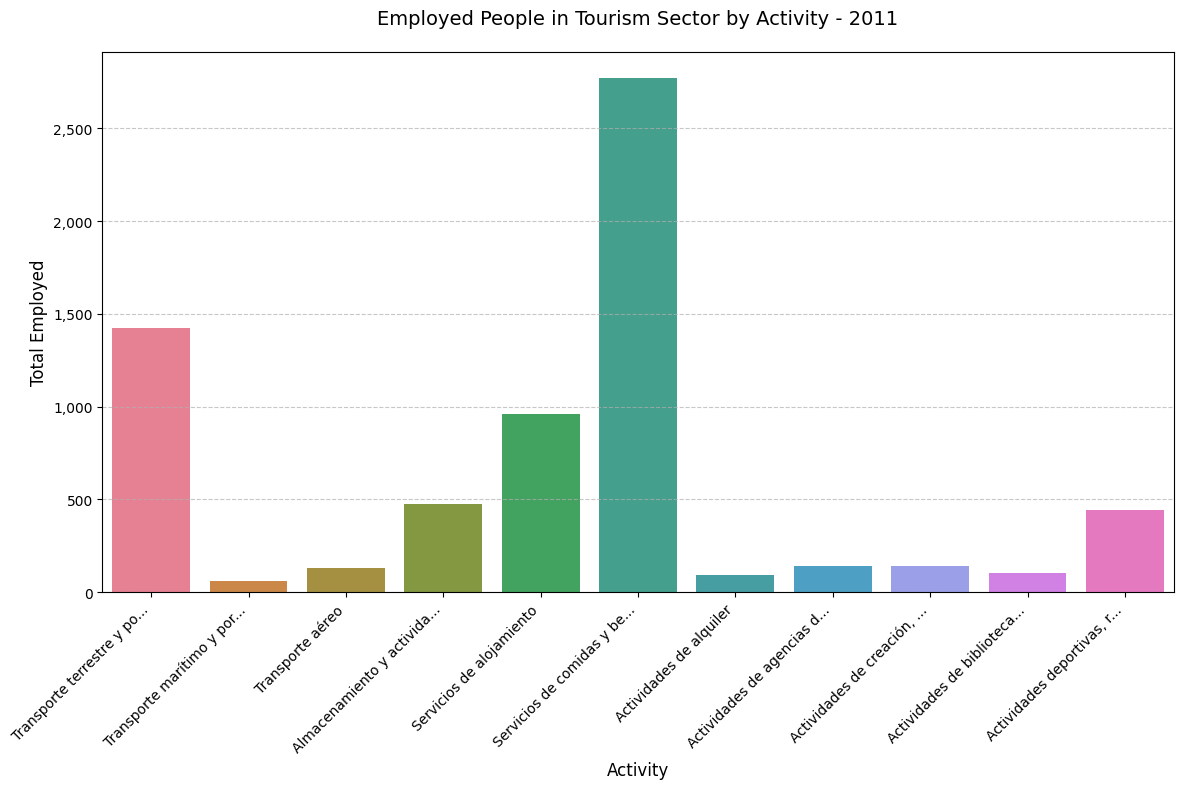

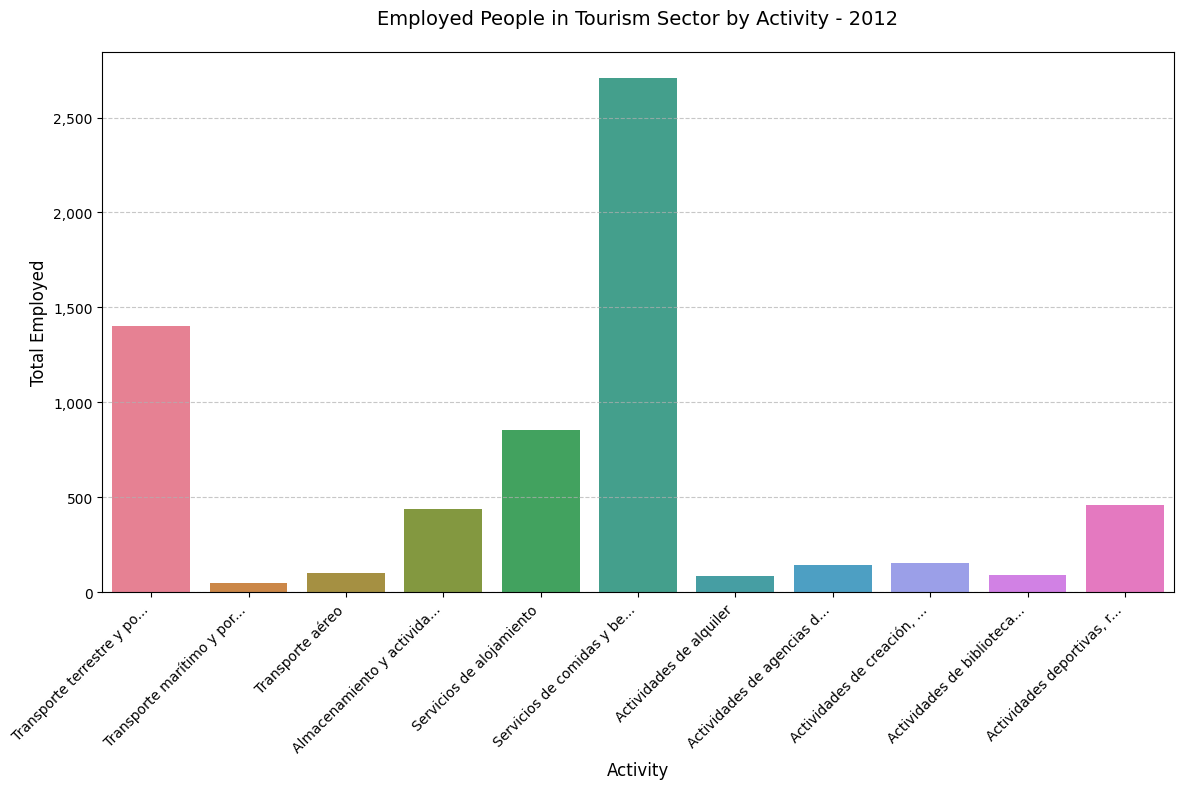

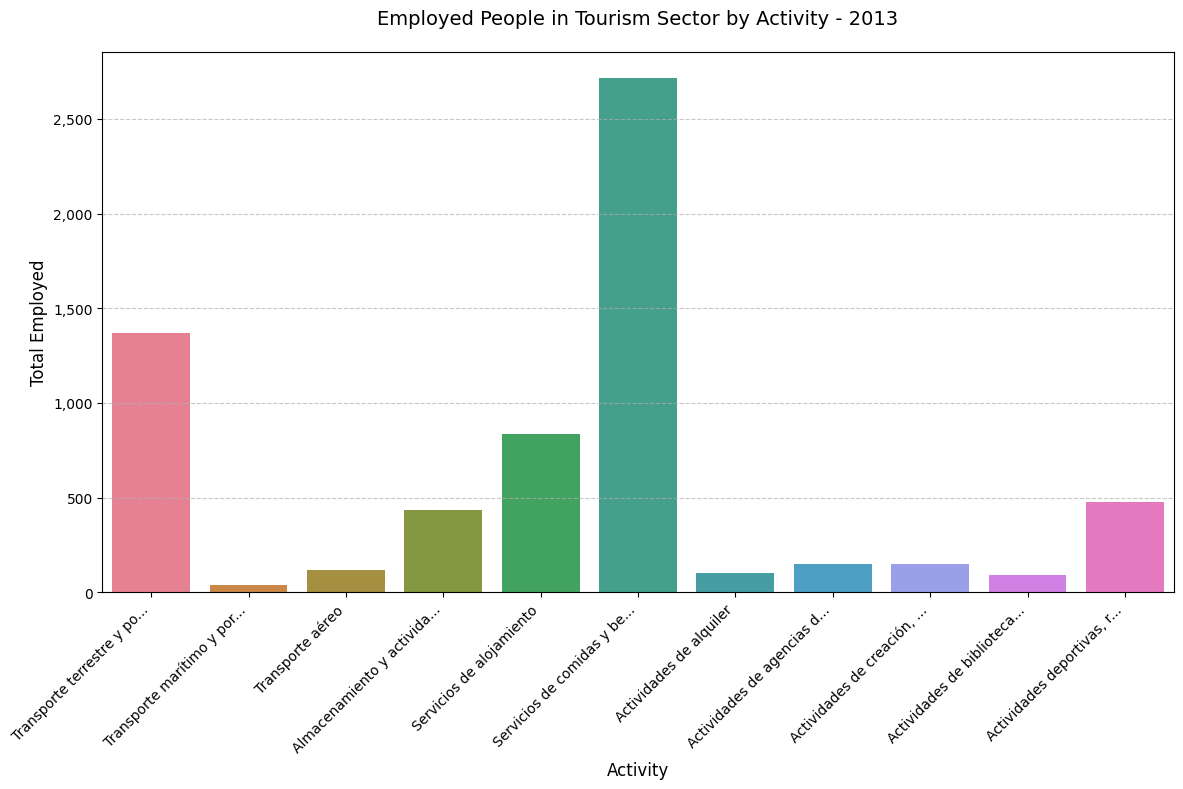

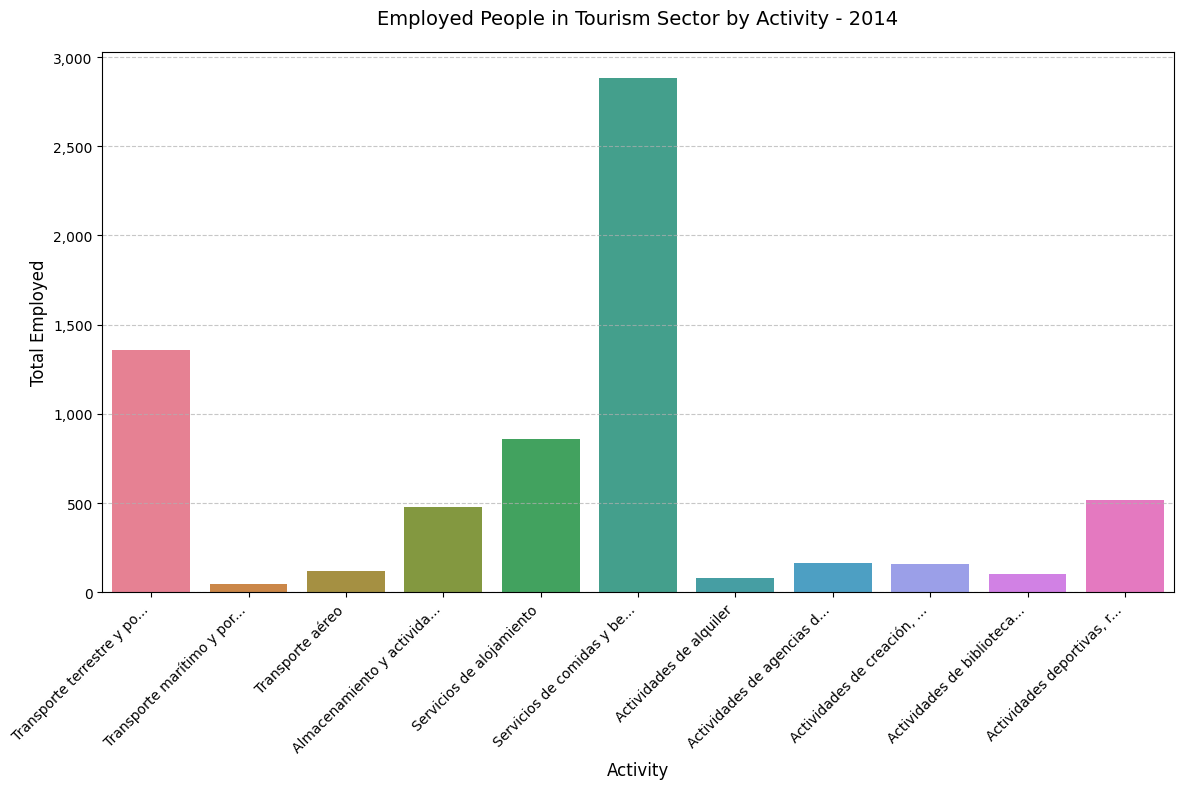

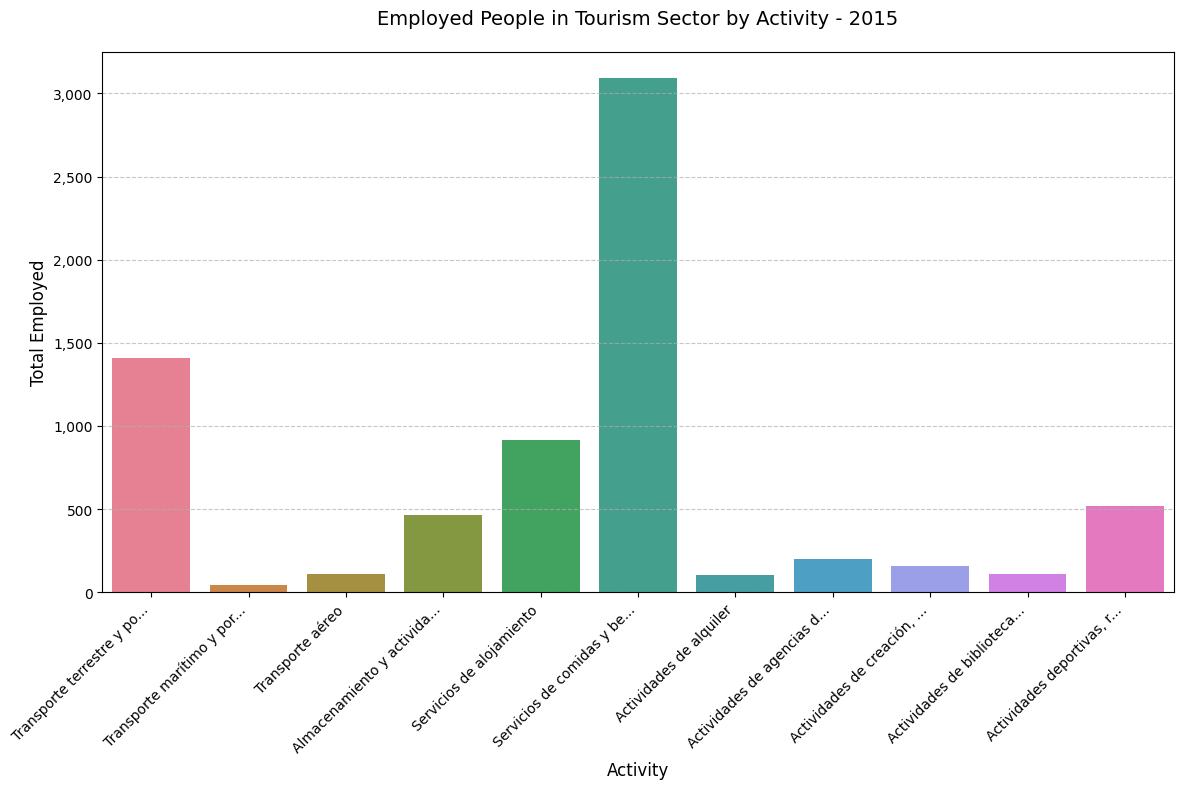

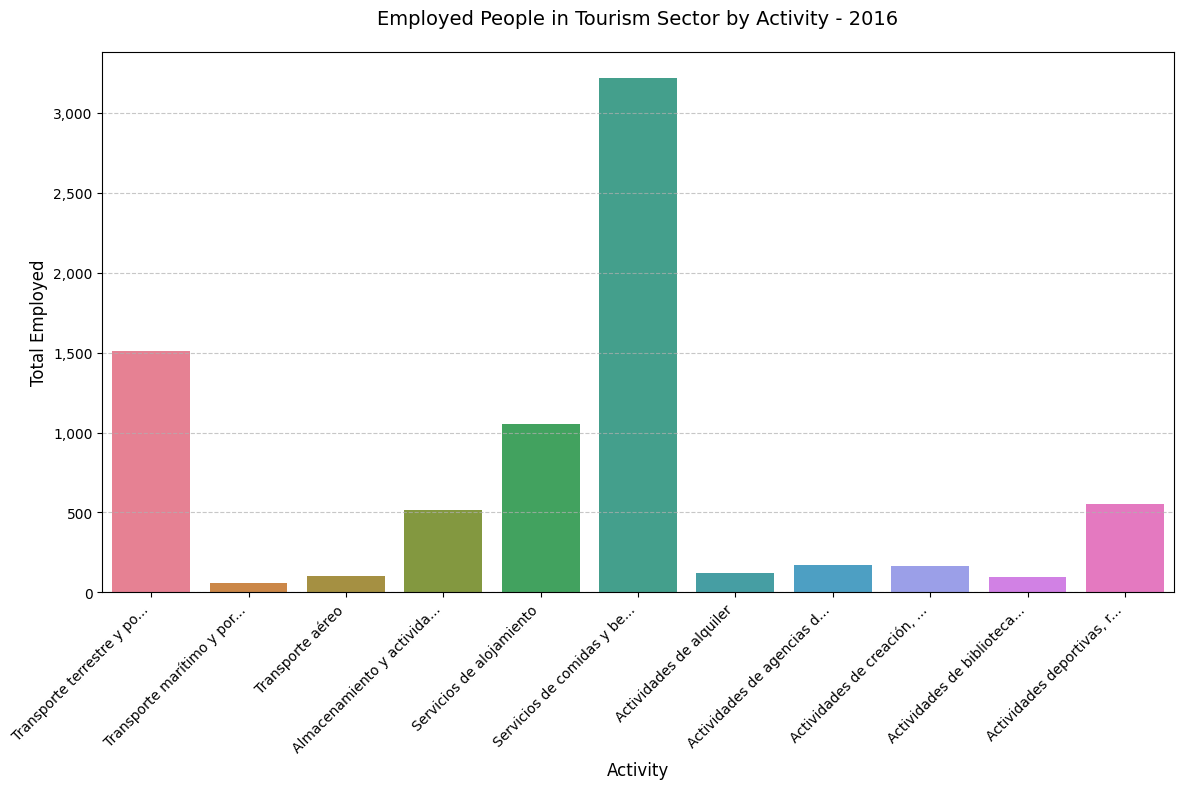

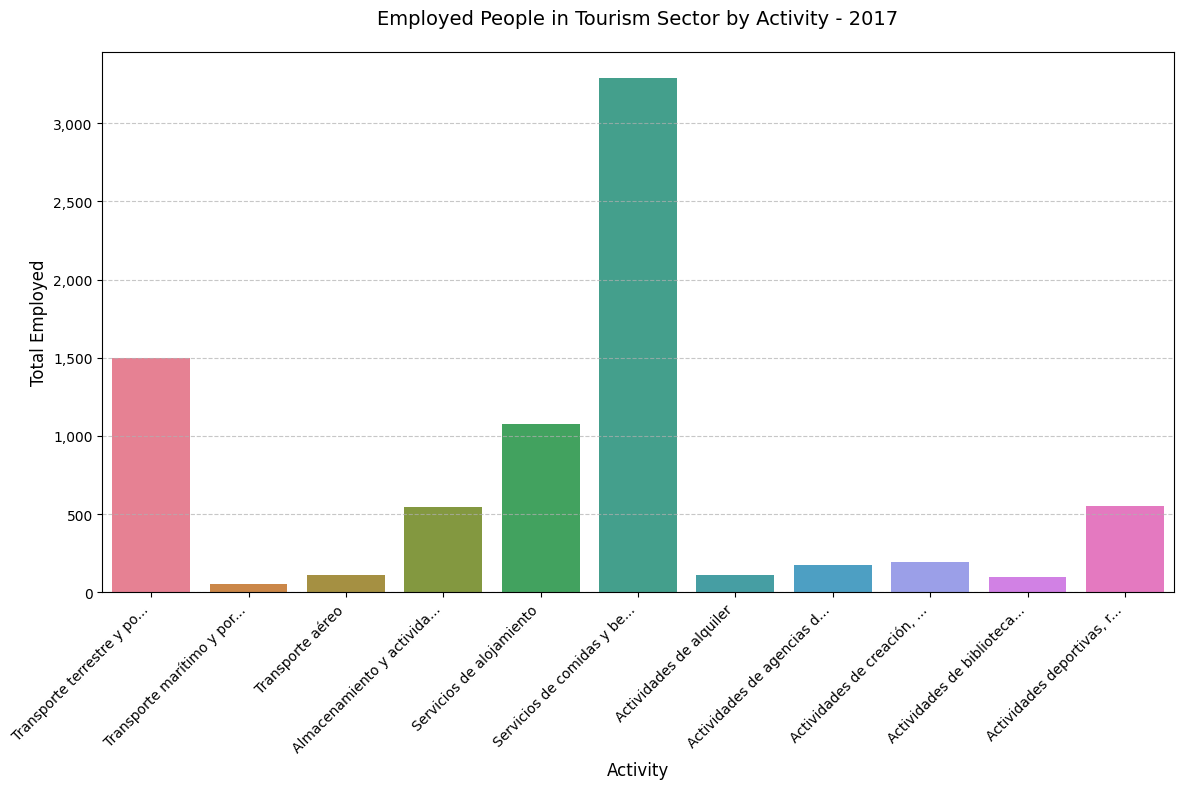

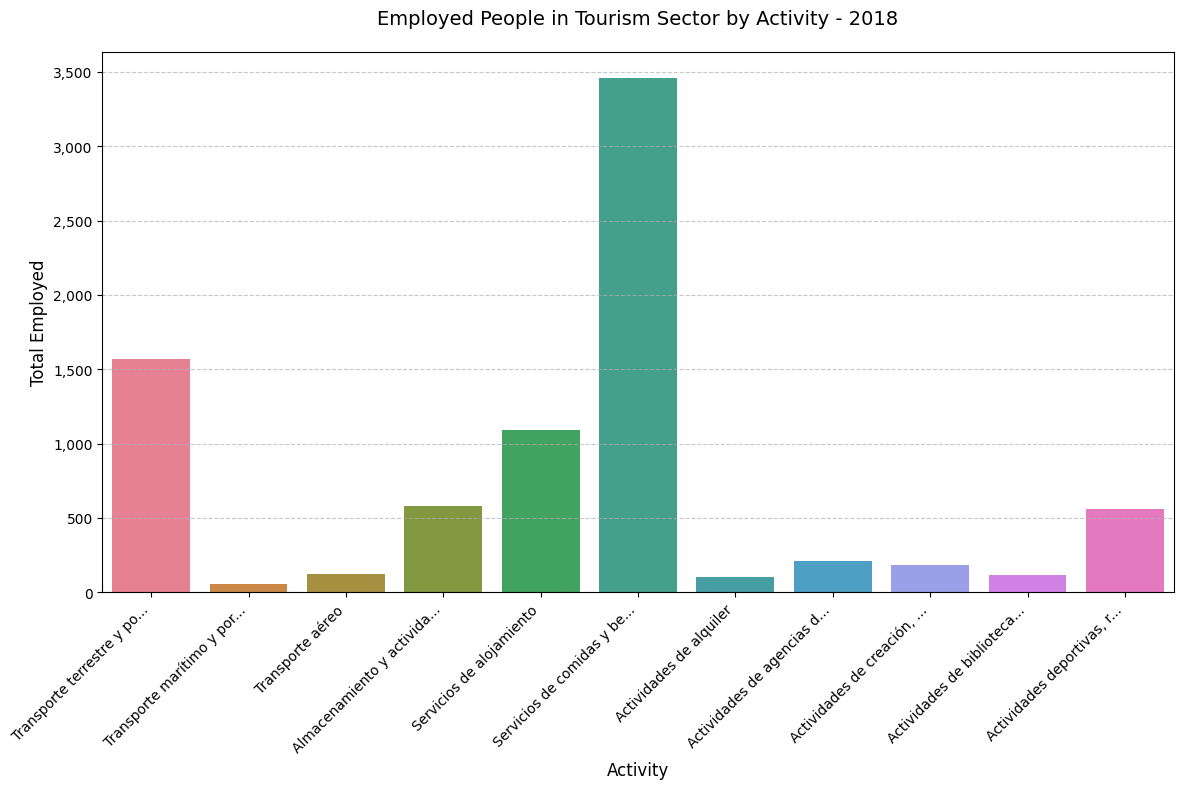

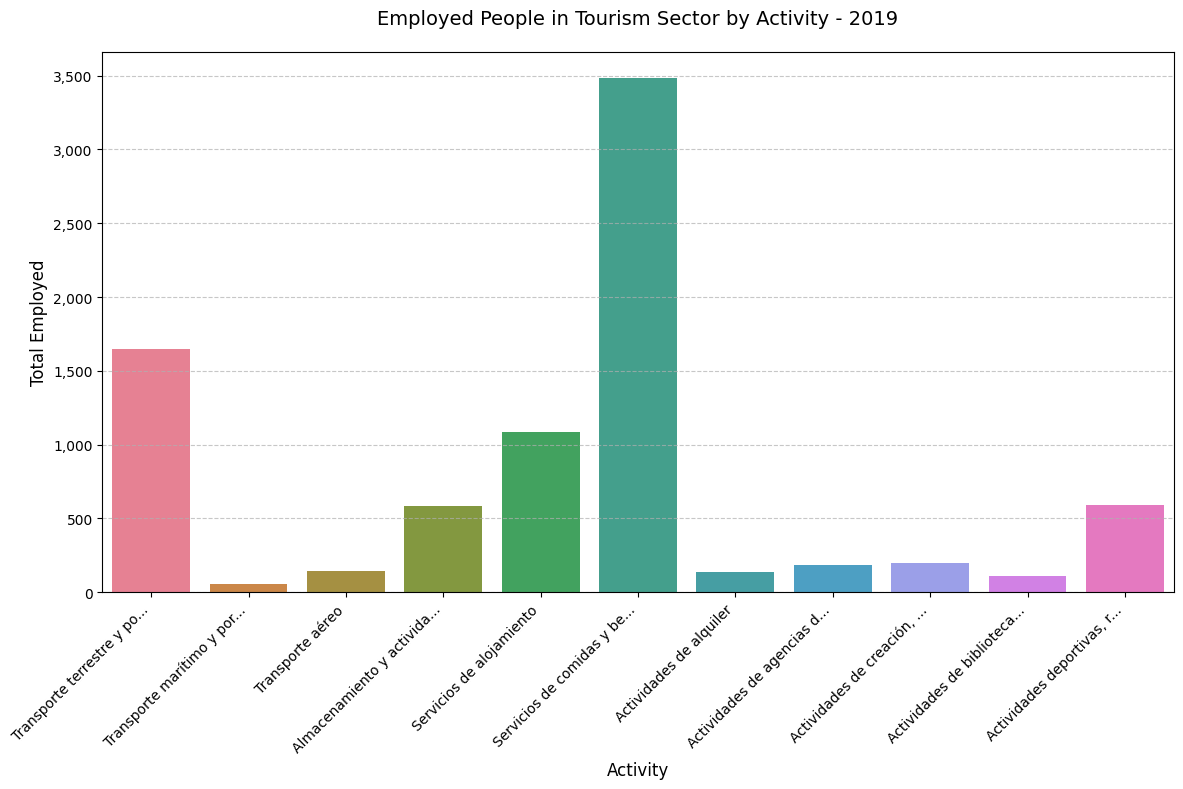

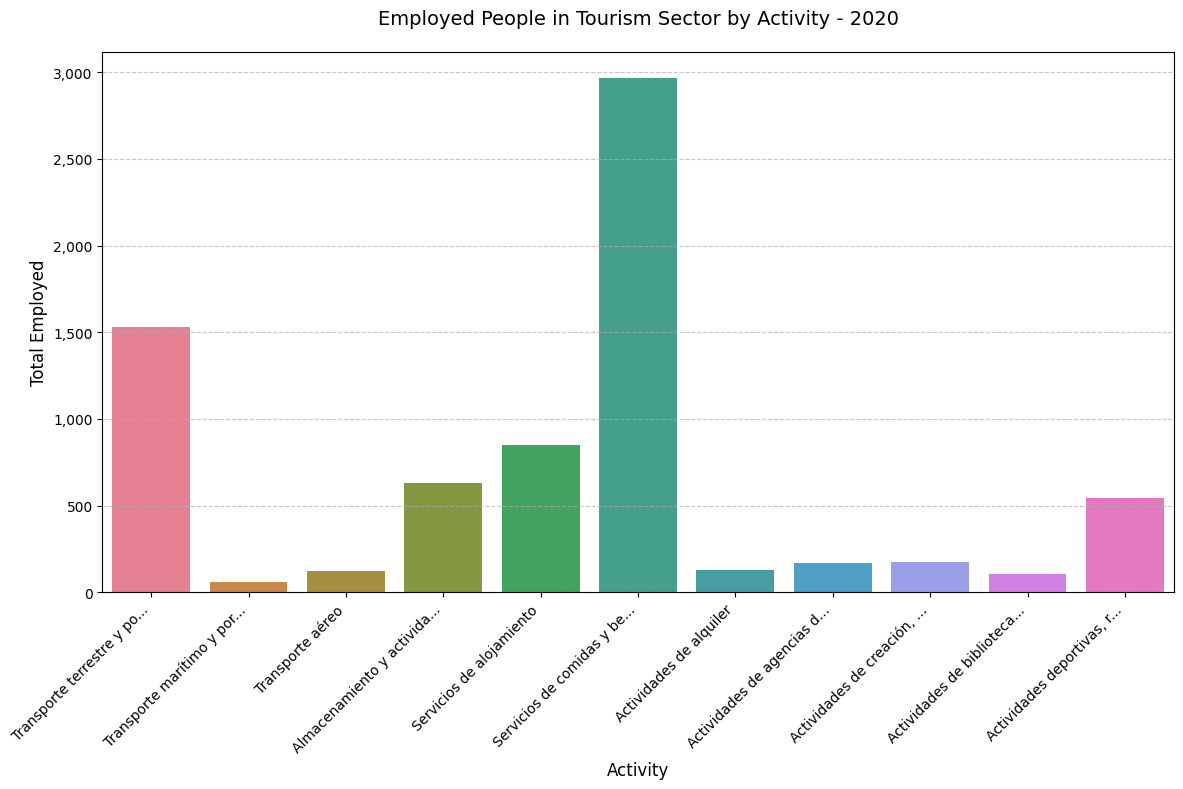

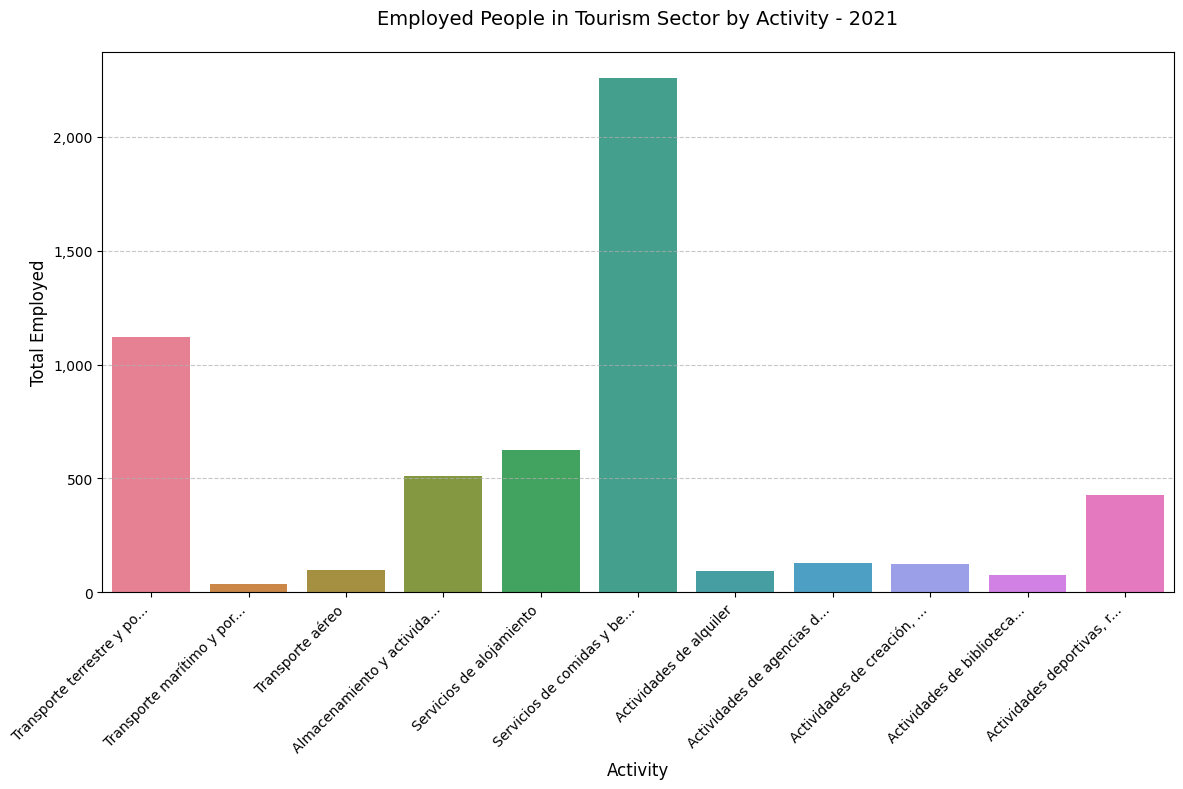

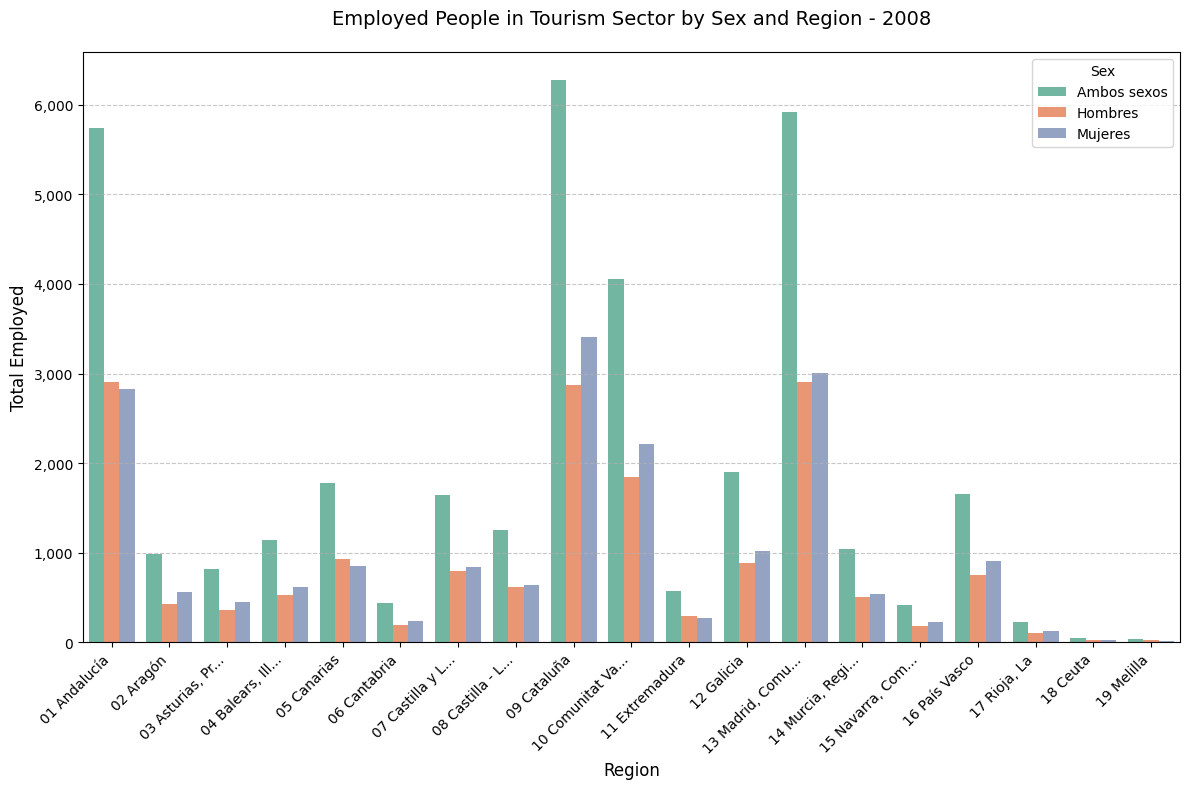

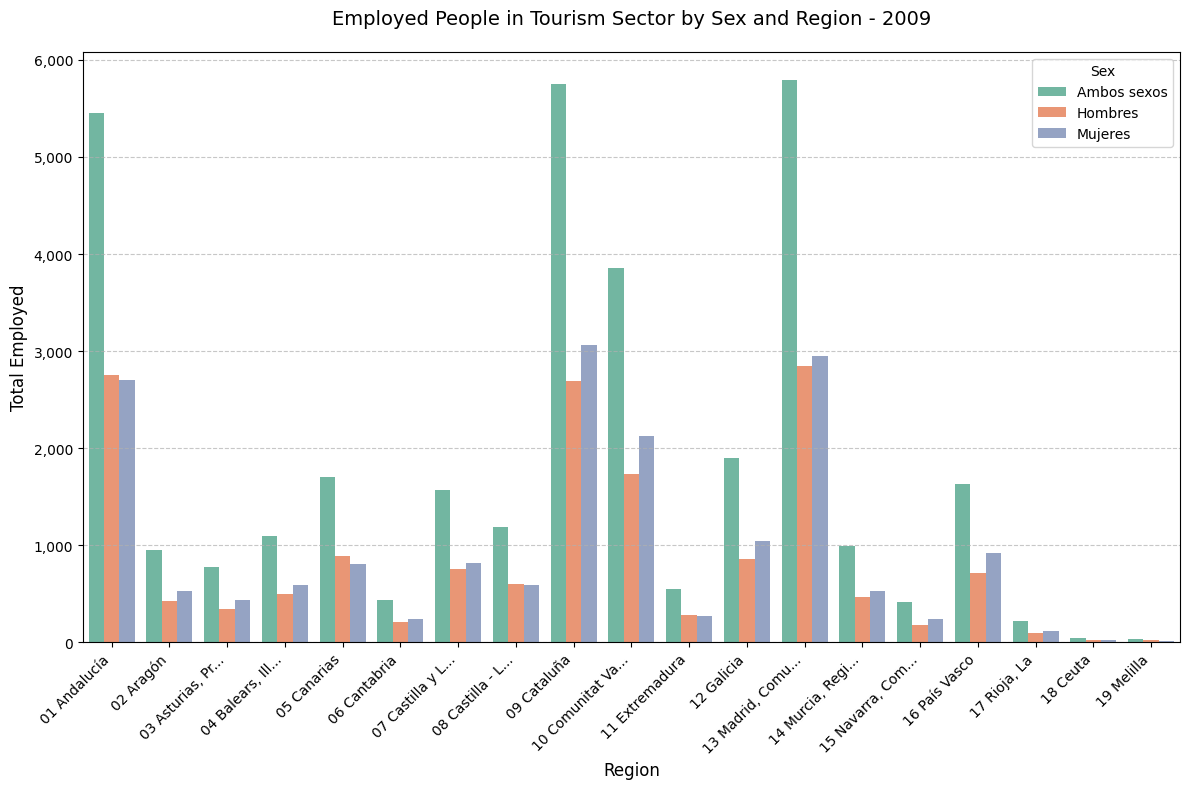

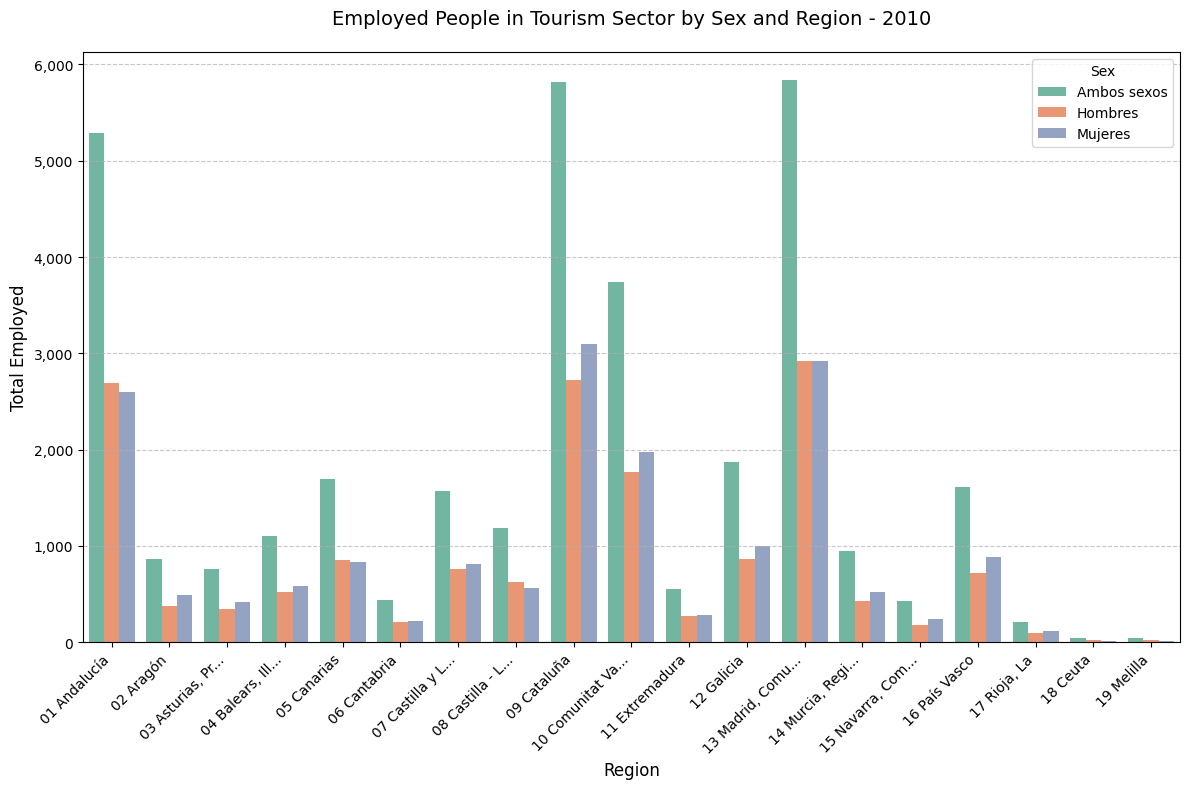

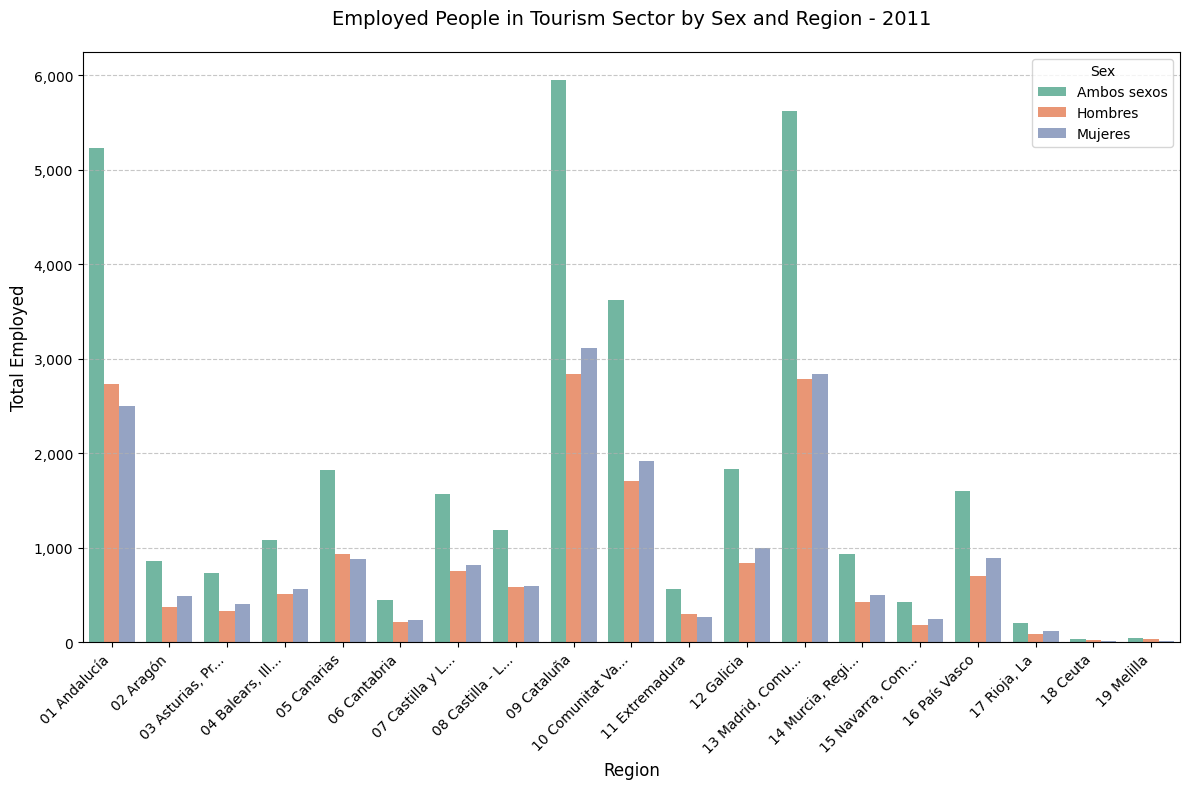

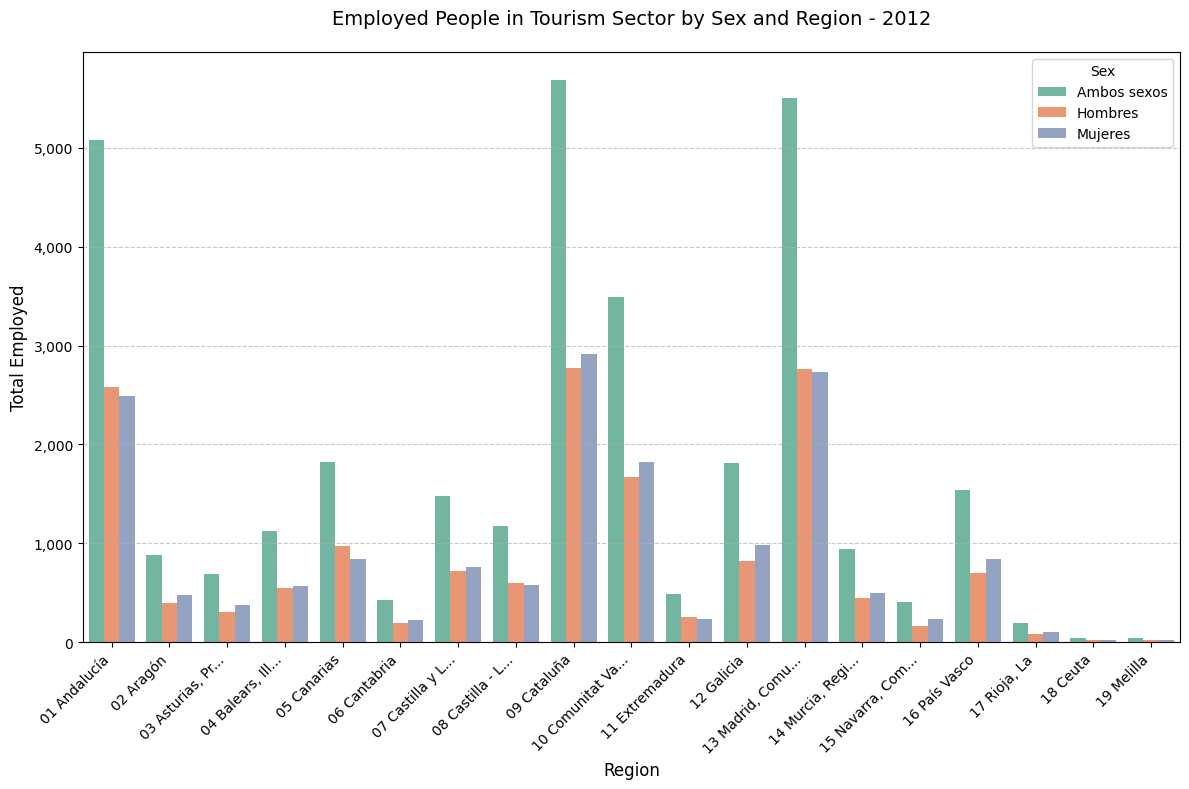

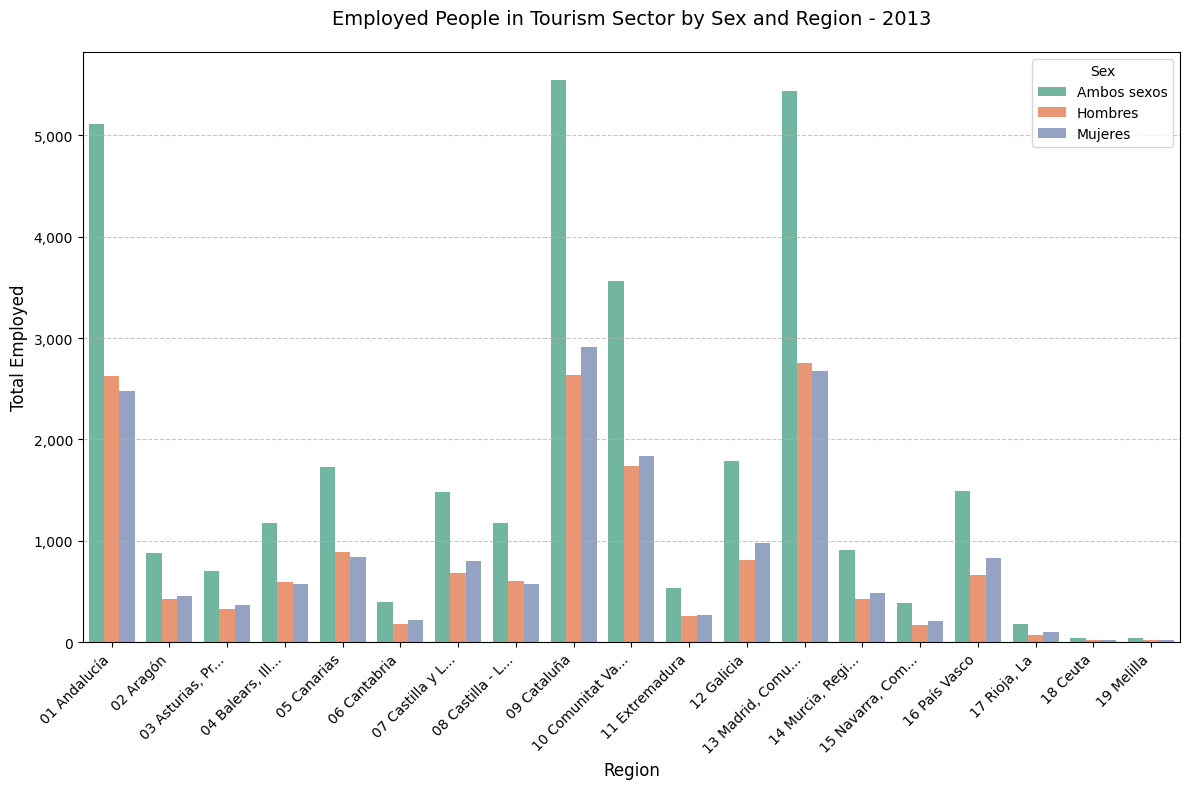

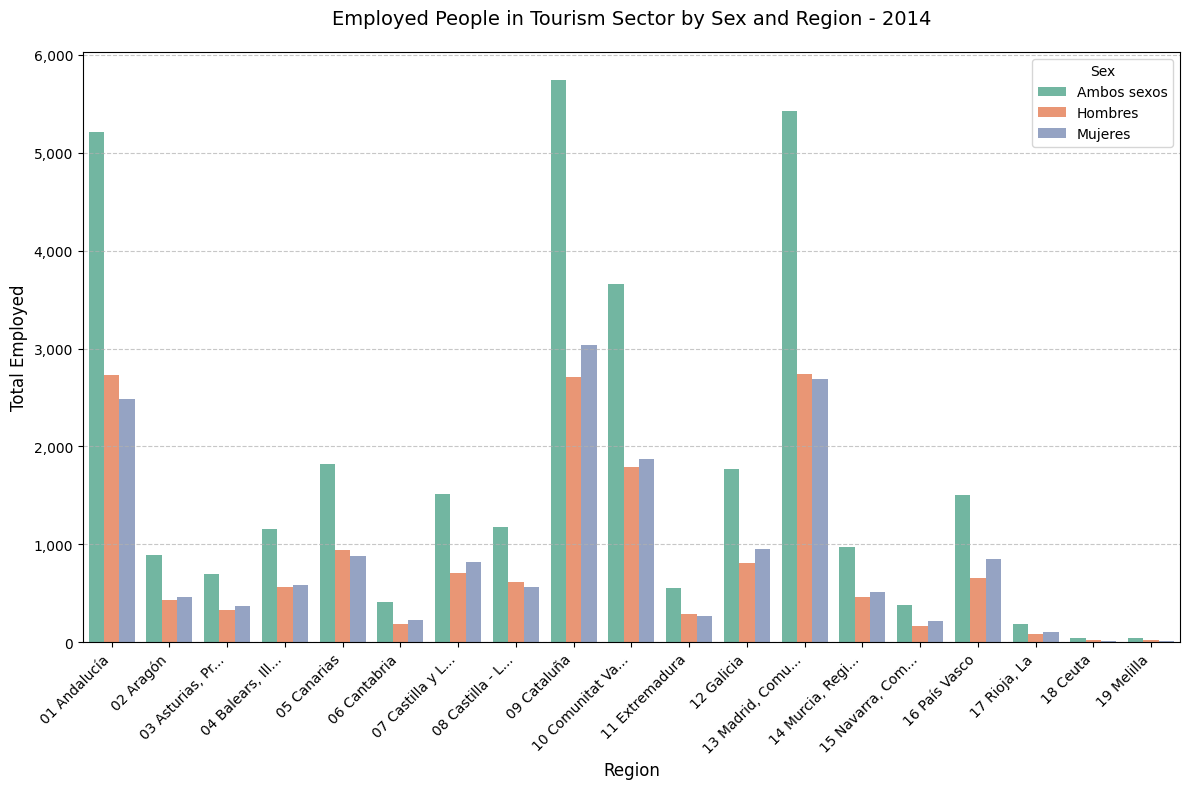

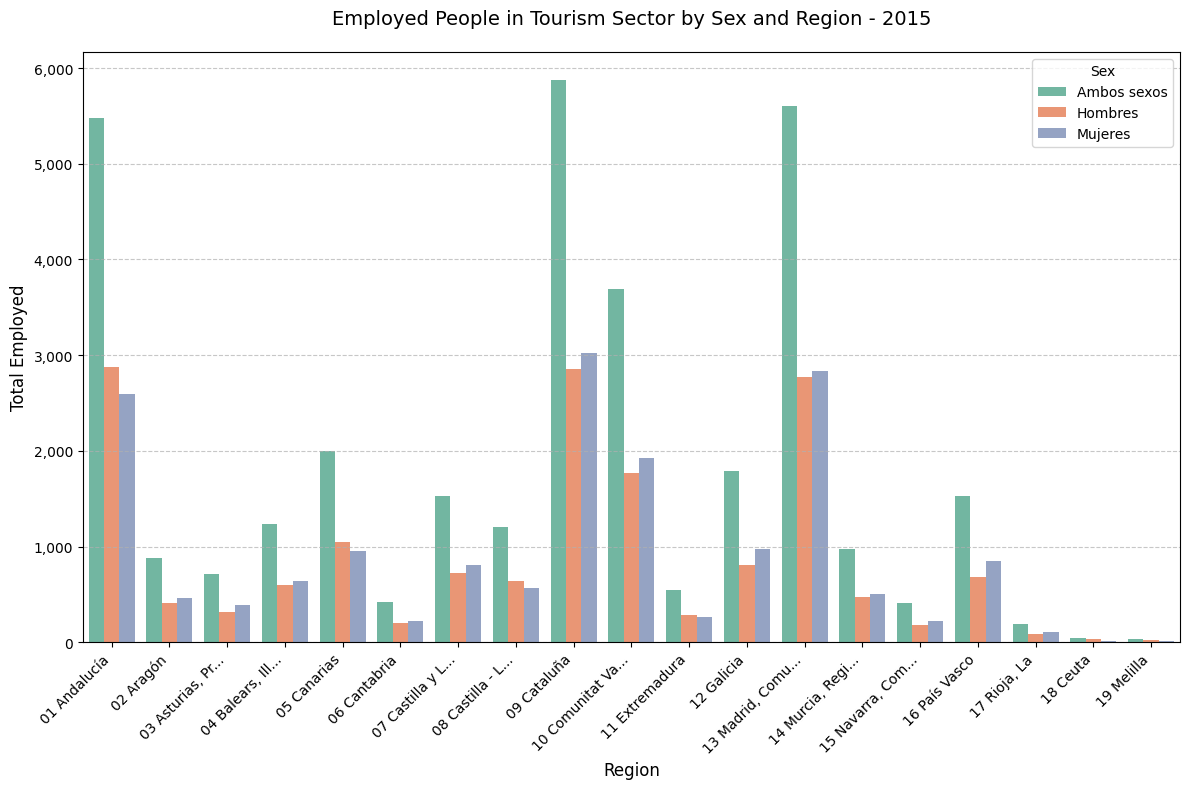

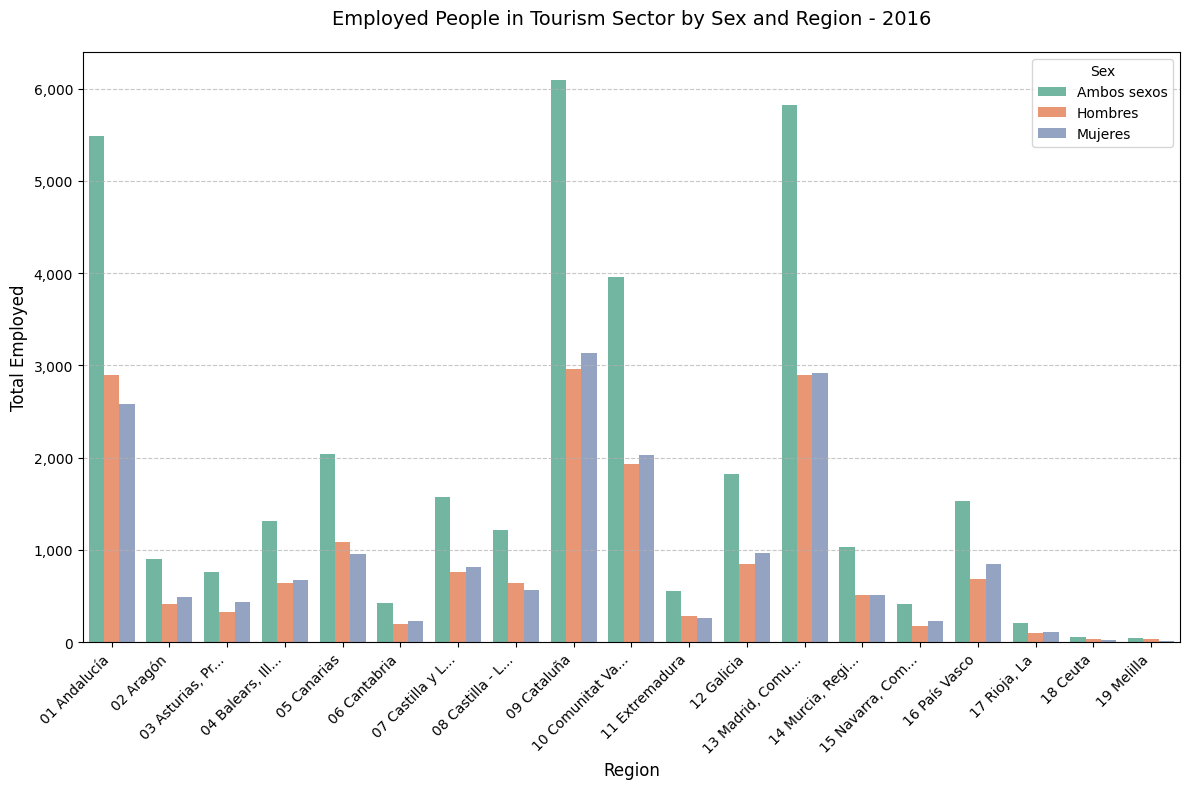

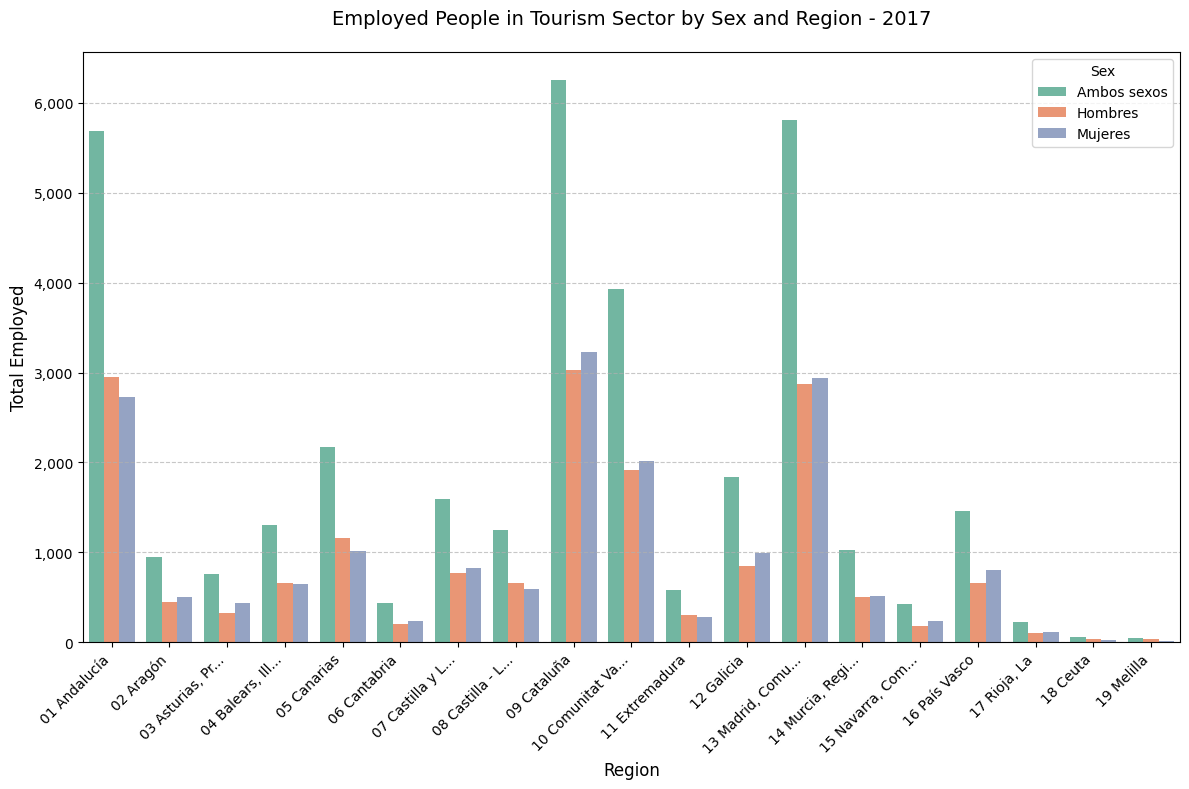

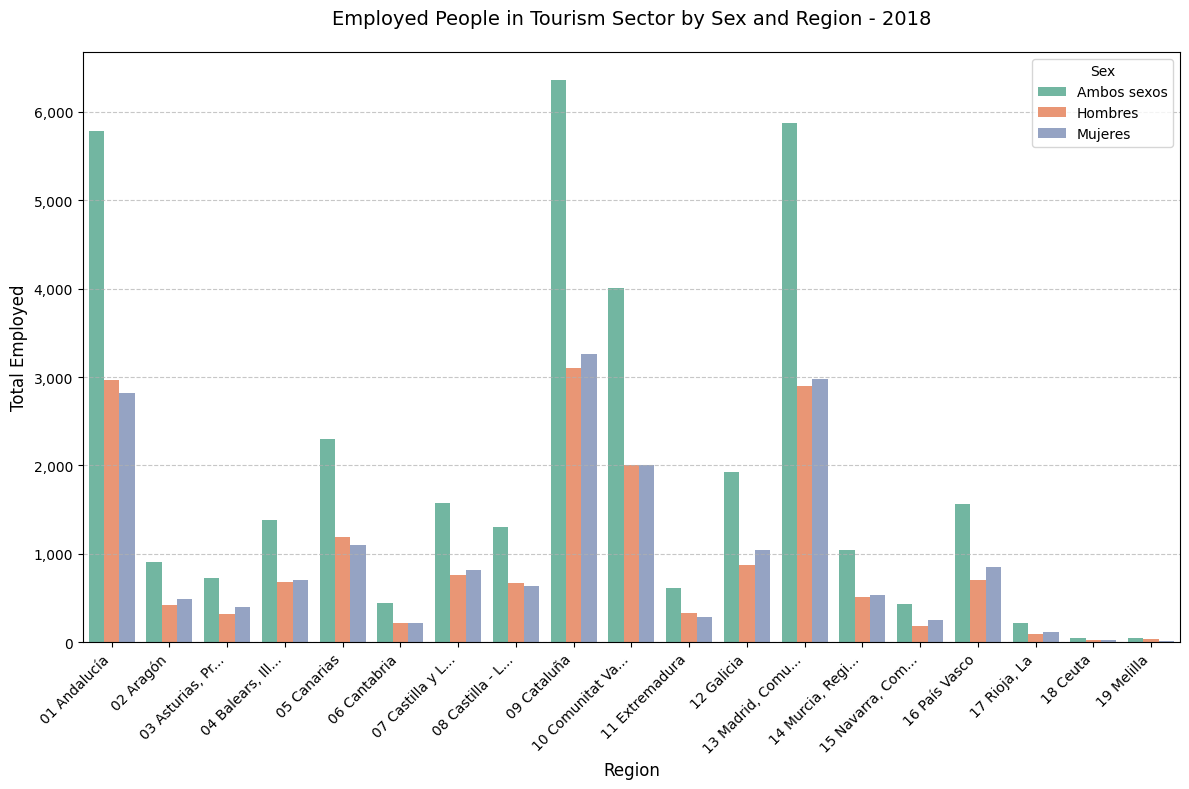

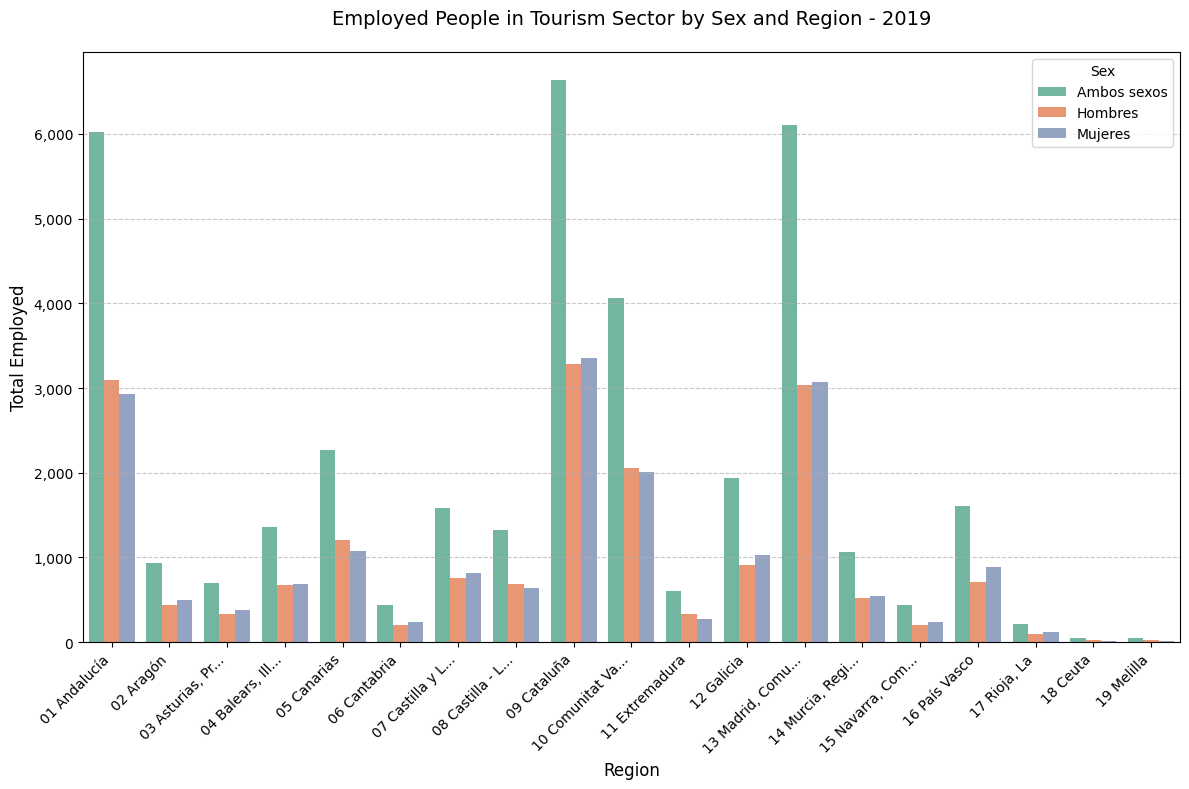

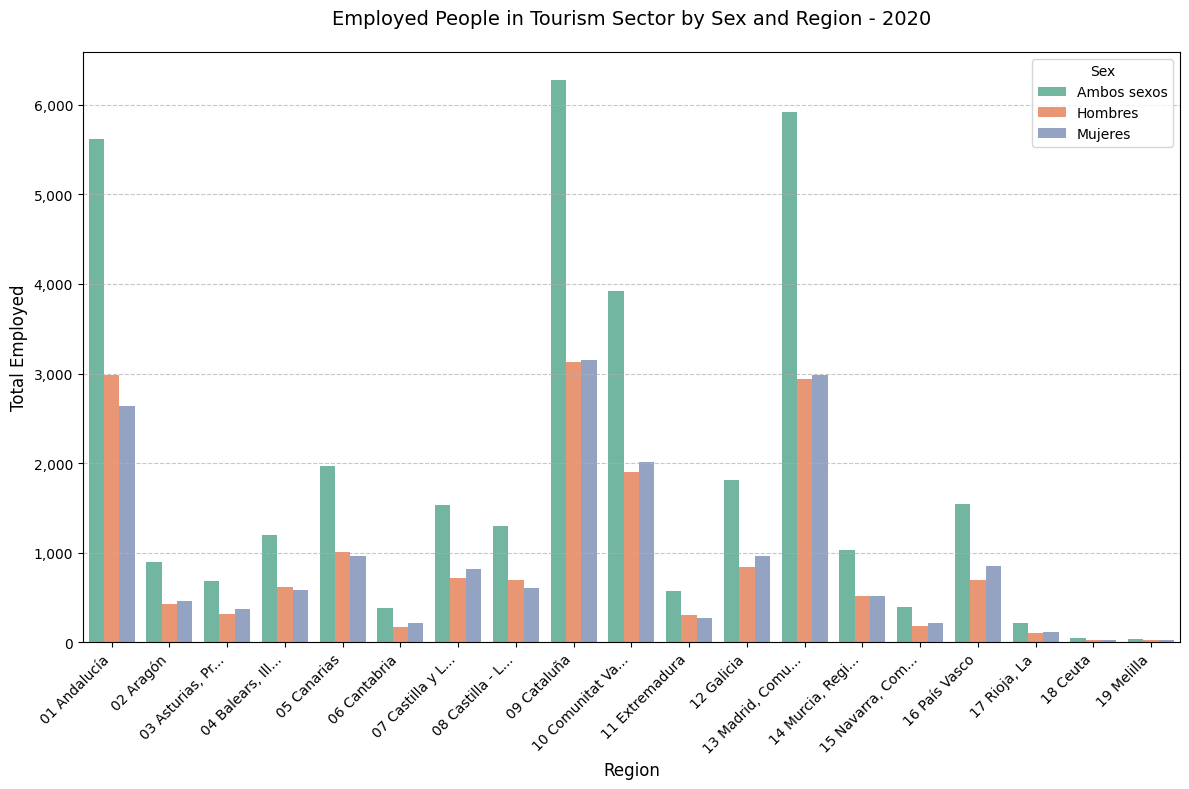

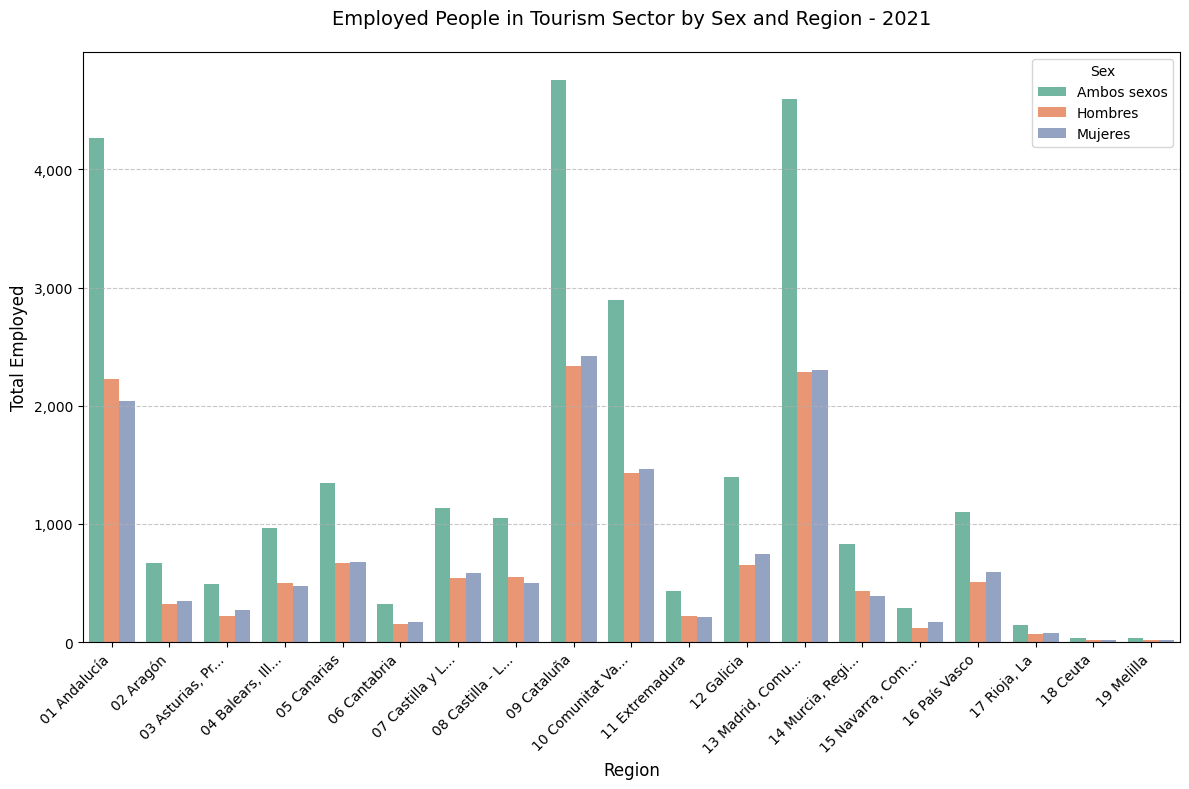

<ipython-input-7-6254075634a8>:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


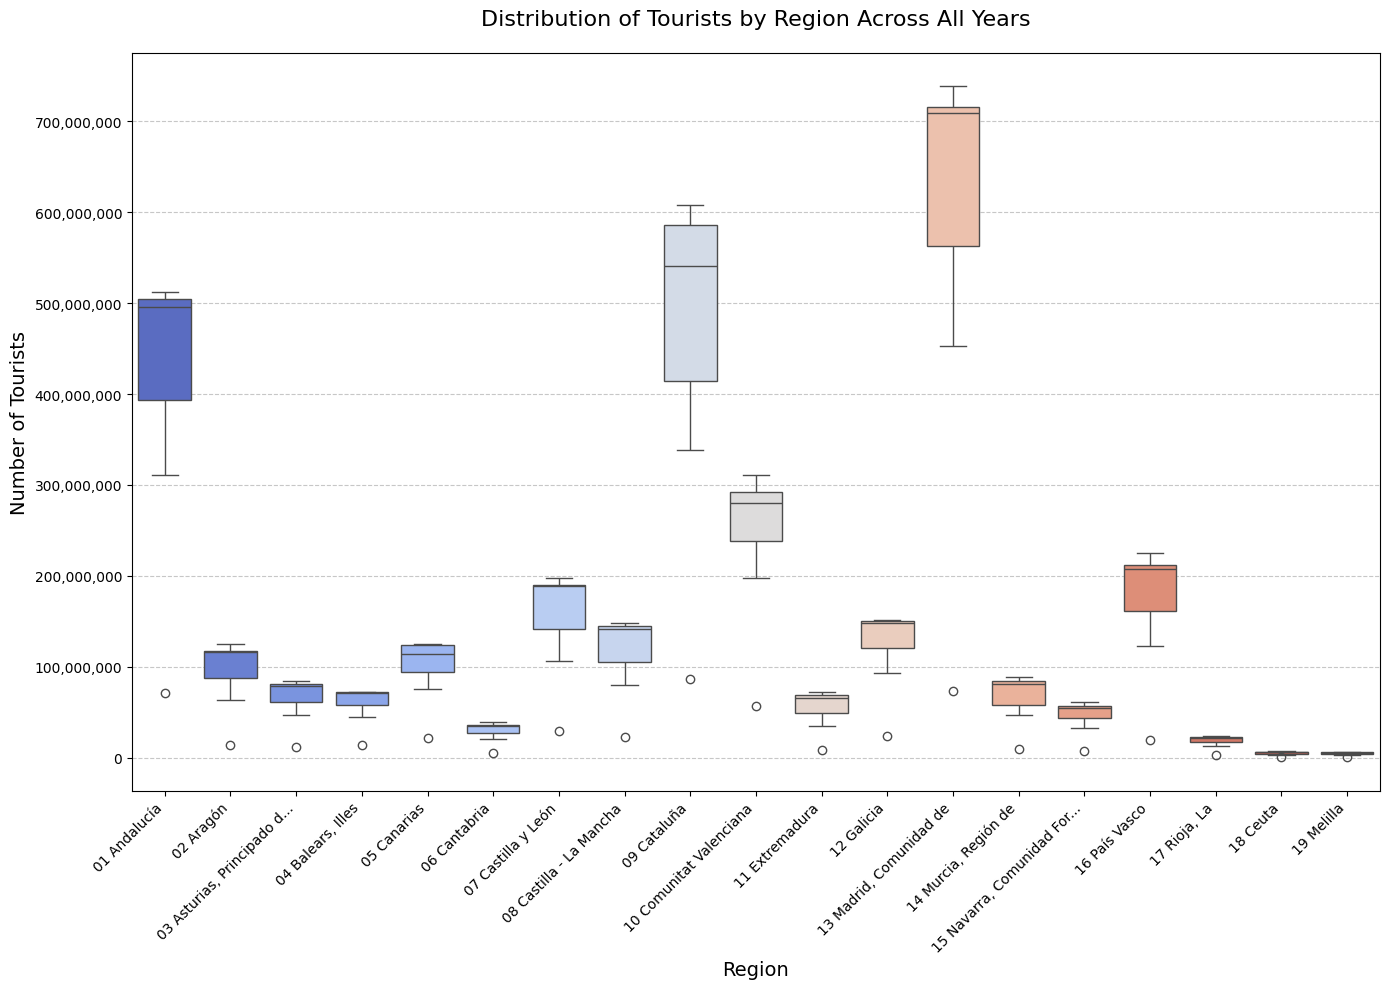

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from IPython.display import display

# --- Step 1: Filter data for absolute values only ---
filtered_employment = filtered_employment2[filtered_employment2["Unidad"] == "Valor absoluto"]

# --- Step 2: Group data for employed people in tourism by activity (CNAE codes) ---
tourism_by_activity = (
    filtered_employment.groupby(['Year', 'Sexo', 'CNAE'])['Total']
    .sum()
    .reset_index()
)

# --- Step 3: Map CNAE codes to activity names ---
# Assuming 'Activity_Name' column exists with CNAE code descriptions
activity_map = dict(zip(filtered_employment2['CNAE'], filtered_employment2['Activity_Name']))
tourism_by_activity['Activity_Name'] = tourism_by_activity['CNAE'].map(activity_map)

# --- Step 4: Truncate long activity names ---
def truncate_text(text, max_length=25):
    """Truncate text to max_length and add ellipsis if needed"""
    if isinstance(text, str) and len(text) > max_length:
        return text[:max_length] + "..."
    return text

# Apply truncation to activity names
tourism_by_activity['Short_Name'] = tourism_by_activity['Activity_Name'].apply(truncate_text)

# Get unique years for separate plots
years = tourism_by_activity['Year'].unique()

# --- Create individual plots for each year ---
for year in years:
    # Filter data for current year
    year_data = tourism_by_activity[tourism_by_activity['Year'] == year]

    # Create figure with appropriate size
    plt.figure(figsize=(12, 8))

    # Create the bar plot - fix the palette warning by using hue with same variable as x
    ax = sns.barplot(
        data=year_data,
        x='Short_Name',
        y='Total',
        hue='Short_Name',  # Add hue parameter to fix the warning
        legend=False,      # Hide the legend since it's redundant
        errorbar=None
    )

    # Rotate and align x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

    # Add space at the bottom for rotated labels
    plt.subplots_adjust(bottom=0.25)

    # Add title and labels
    plt.title(f'Employed People in Tourism Sector by Activity - {year}', fontsize=14, pad=20)
    plt.xlabel('Activity', fontsize=12)
    plt.ylabel('Total Employed', fontsize=12)

    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Format y-axis with comma separator for thousands
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

    # Tight layout
    plt.tight_layout()

    # Display the plot (this will display in Colab)
    display(plt.gcf())
    plt.close()

# --- For the second visualization (by CCAA) ---
# --- Step 5: Group data for employed people by year, sex, and CCAA ---
tourism_by_year_sex = (
    filtered_employment1.groupby(['Year', 'Sexo', 'CCAA'])['Total']
    .sum()
    .reset_index()
)

# --- Step 6: Map CCAA codes to community names ---
ccaa_map = dict(zip(filtered_employment1['CCAA'], filtered_employment1['Comunidades y Ciudades Autónomas']))
tourism_by_year_sex['CCAA_Name'] = tourism_by_year_sex['CCAA'].map(ccaa_map)
tourism_by_year_sex['CCAA_Short'] = tourism_by_year_sex['CCAA_Name'].apply(truncate_text, max_length=15)

# Get unique years for separate plots
years_ccaa = tourism_by_year_sex['Year'].unique()

# --- Create individual plots for each year ---
for year in years_ccaa:
    # Filter data for current year
    year_data = tourism_by_year_sex[tourism_by_year_sex['Year'] == year]

    # Create figure with appropriate size
    plt.figure(figsize=(12, 8))

    # Create the bar plot
    ax = sns.barplot(
        data=year_data,
        x='CCAA_Short',
        y='Total',
        hue='Sexo',
        palette='Set2',
        errorbar=None
    )

    # Rotate and align x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

    # Add space at the bottom for rotated labels
    plt.subplots_adjust(bottom=0.25)

    # Add title and labels
    plt.title(f'Employed People in Tourism Sector by Sex and Region - {year}', fontsize=14, pad=20)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Total Employed', fontsize=12)

    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Format y-axis with comma separator for thousands
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

    # Add legend with better placement
    plt.legend(title='Sex', loc='upper right')

    # Tight layout
    plt.tight_layout()

    # Display the plot (this will display in Colab)
    display(plt.gcf())
    plt.close()

# --- Step 8: Group tourist data by year and CCAA ---
tourists_by_year_ccaa = tourism4.groupby(['Year', 'CCAA'])['Total'].sum().reset_index()

# --- Step 9: Map CCAA codes to community names ---
tourists_by_year_ccaa['CCAA_Name'] = tourists_by_year_ccaa['CCAA'].map(ccaa_map)
tourists_by_year_ccaa['CCAA_Short'] = tourists_by_year_ccaa['CCAA_Name'].apply(truncate_text, max_length=25)

# Create the boxplot
plt.figure(figsize=(14, 10))
ax = sns.boxplot(
    data=tourists_by_year_ccaa,
    x='CCAA_Short',
    y='Total',
    palette='coolwarm'
)

# Rotate and align x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Add space at the bottom for rotated labels
plt.subplots_adjust(bottom=0.25)

# Add title and labels
plt.title('Distribution of Tourists by Region Across All Years', fontsize=16, pad=20)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Tourists', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis with comma separator for thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Tight layout
plt.tight_layout()

# Display the plot
display(plt.gcf())
plt.close()

## Milestone 4

1. Plot a line plot representing the variation across time of the number of turists by reason for the trip.
2. Plot the time series of the total and average expenses by CCAA of residency for those trips within the Autonomous Community and outside (*Dentro de la Comunidad Autónoma* and *A otra Comunidad Autónoma*).

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

  Motivo del viaje Tipo de dato  Periodo      Total  Year Month
0            Total    Dato base  2021M09  4691486.0  2021    09
1            Total    Dato base  2021M08  5194212.0  2021    08
2            Total    Dato base  2021M07  4395384.0  2021    07
3            Total    Dato base  2021M06  2215710.0  2021    06
4            Total    Dato base  2021M05  1363624.0  2021    05
              Motivo del viaje Tipo de dato  Periodo      Total  Year Month
288  Ocio, recreo y vacaciones    Dato base  2021M09  4150250.0  2021    09
289  Ocio, recreo y vacaciones    Dato base  2021M08  4755539.0  2021    08
290  Ocio, recreo y vacaciones    Dato base  2021M07  3868622.0  2021    07
291  Ocio, recreo y vacaciones    Dato base  2021M06  1775593.0  2021    06
292  Ocio, recreo y vacaciones    Dato base  2021M05  1006689.0  2021    05
..                         ...          ...      ...        ...   ...   ...
931              Otros motivos    Dato base  2016M02   423403.0  2016    02
932     

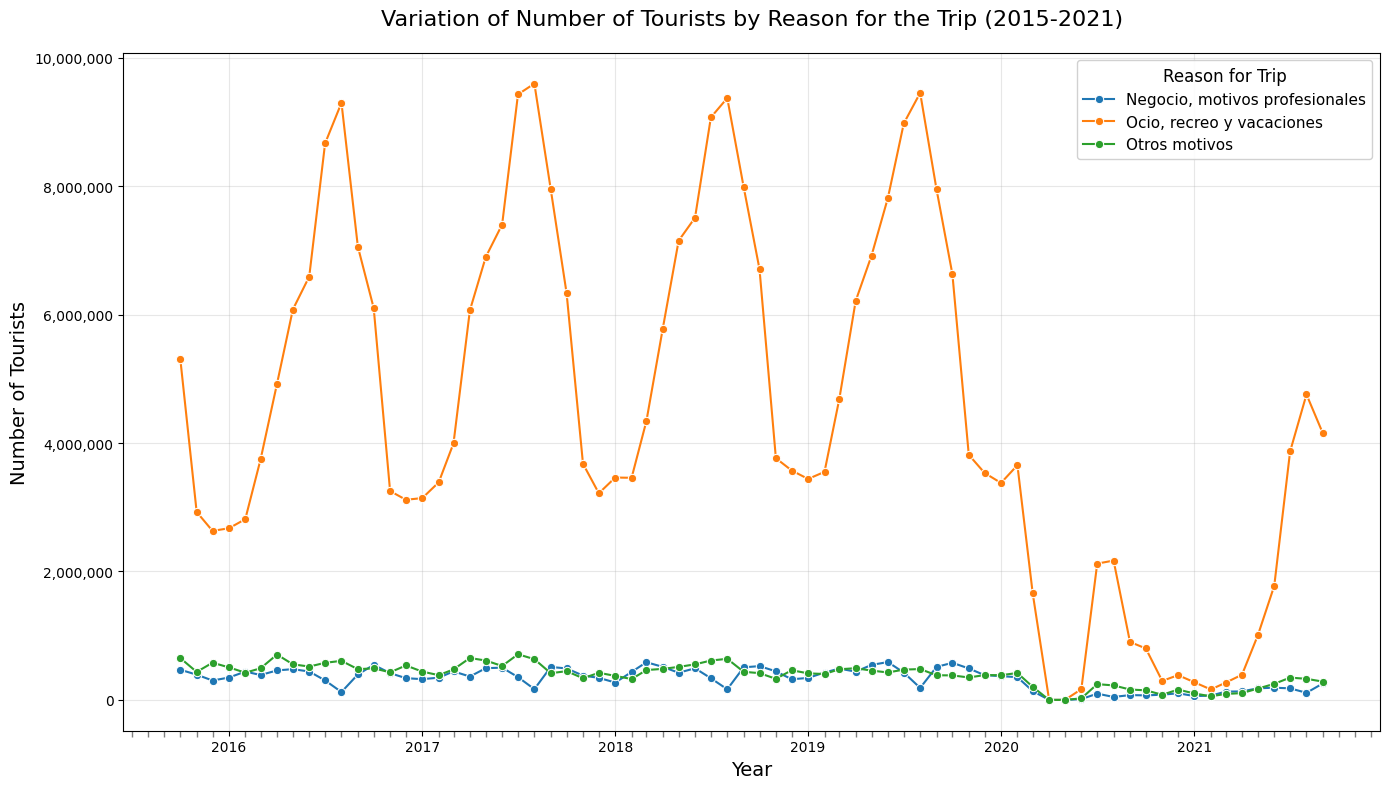

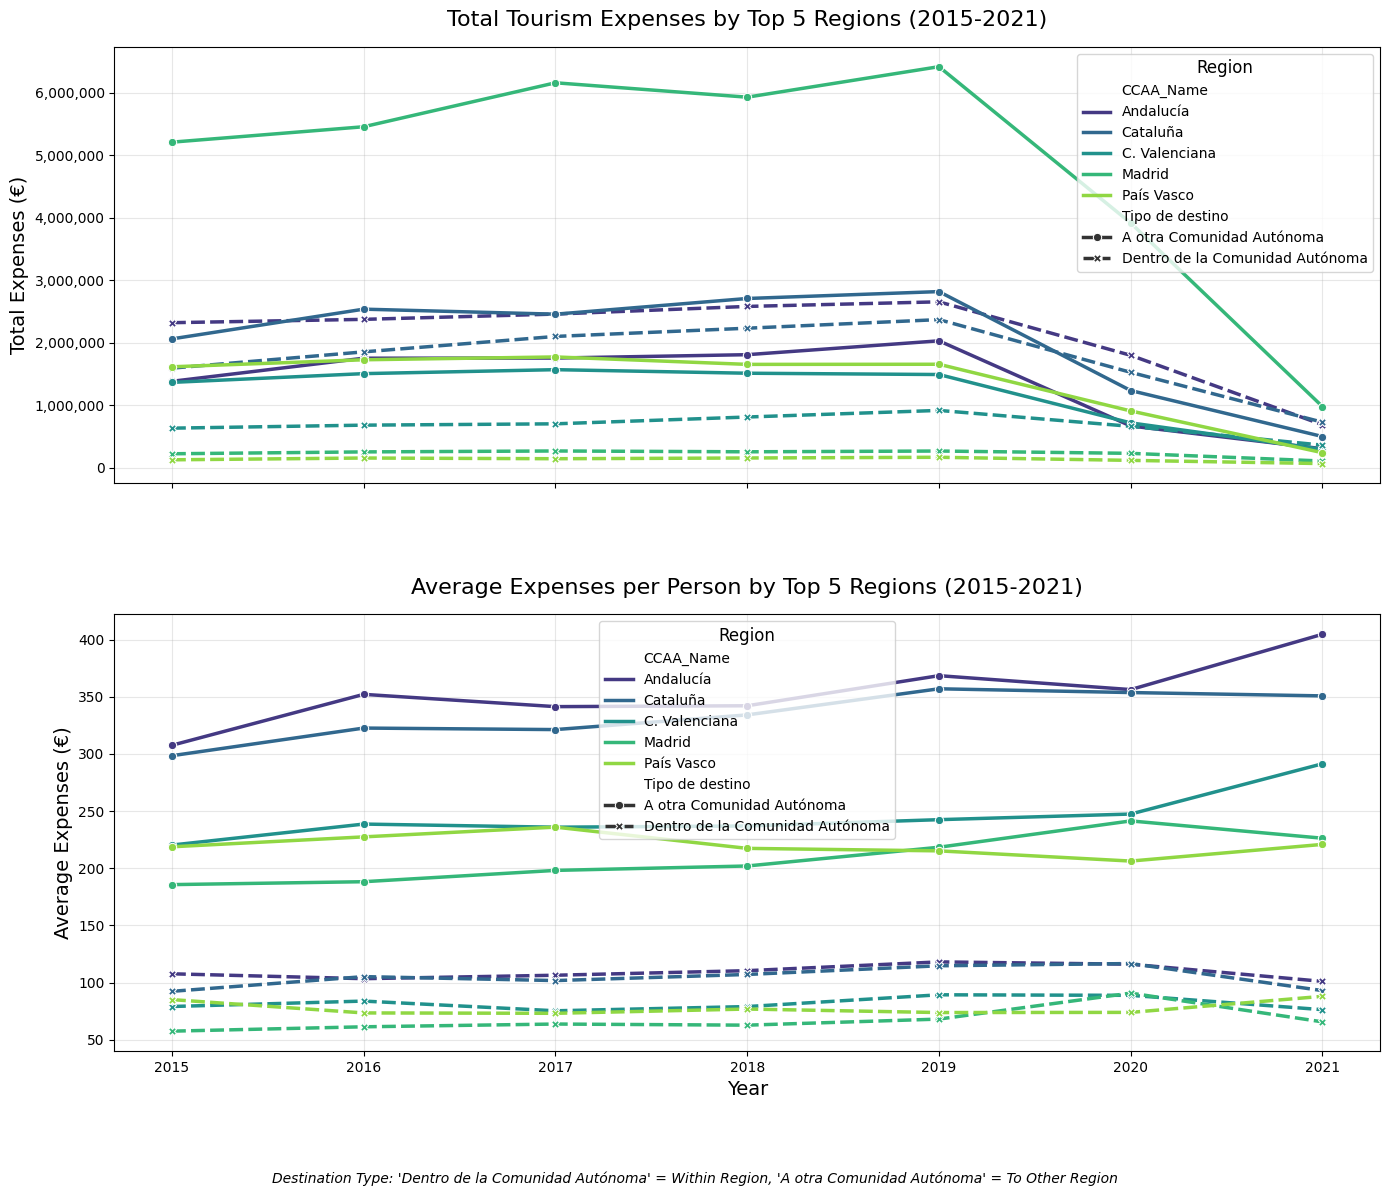

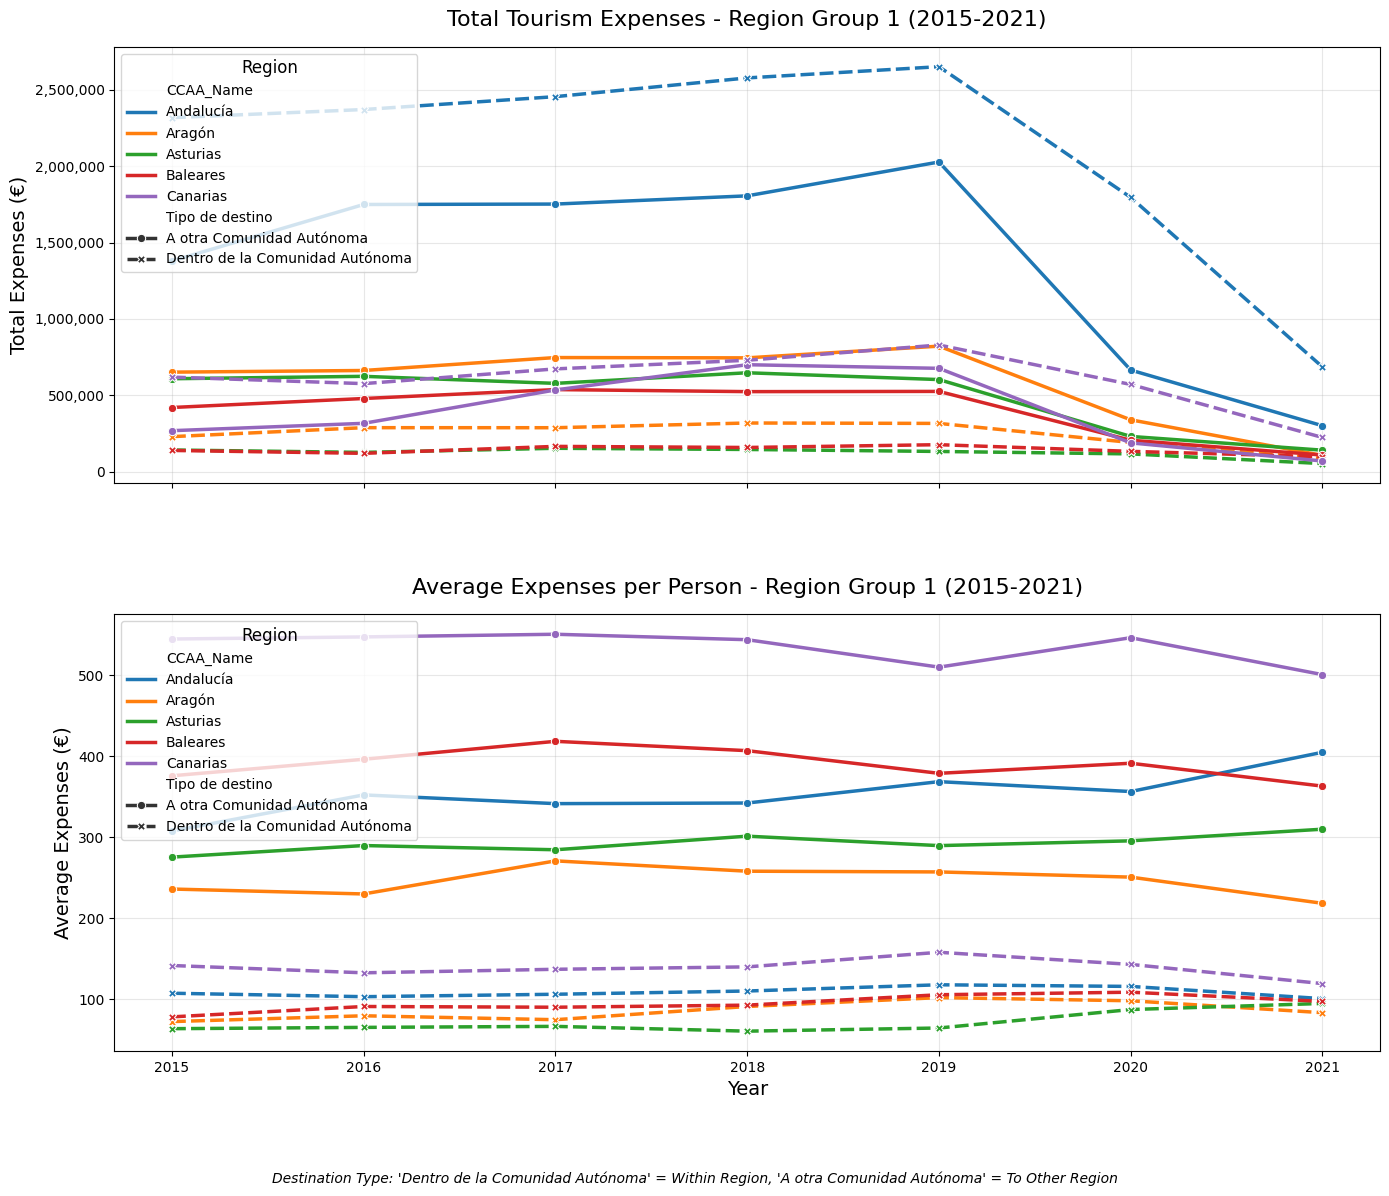

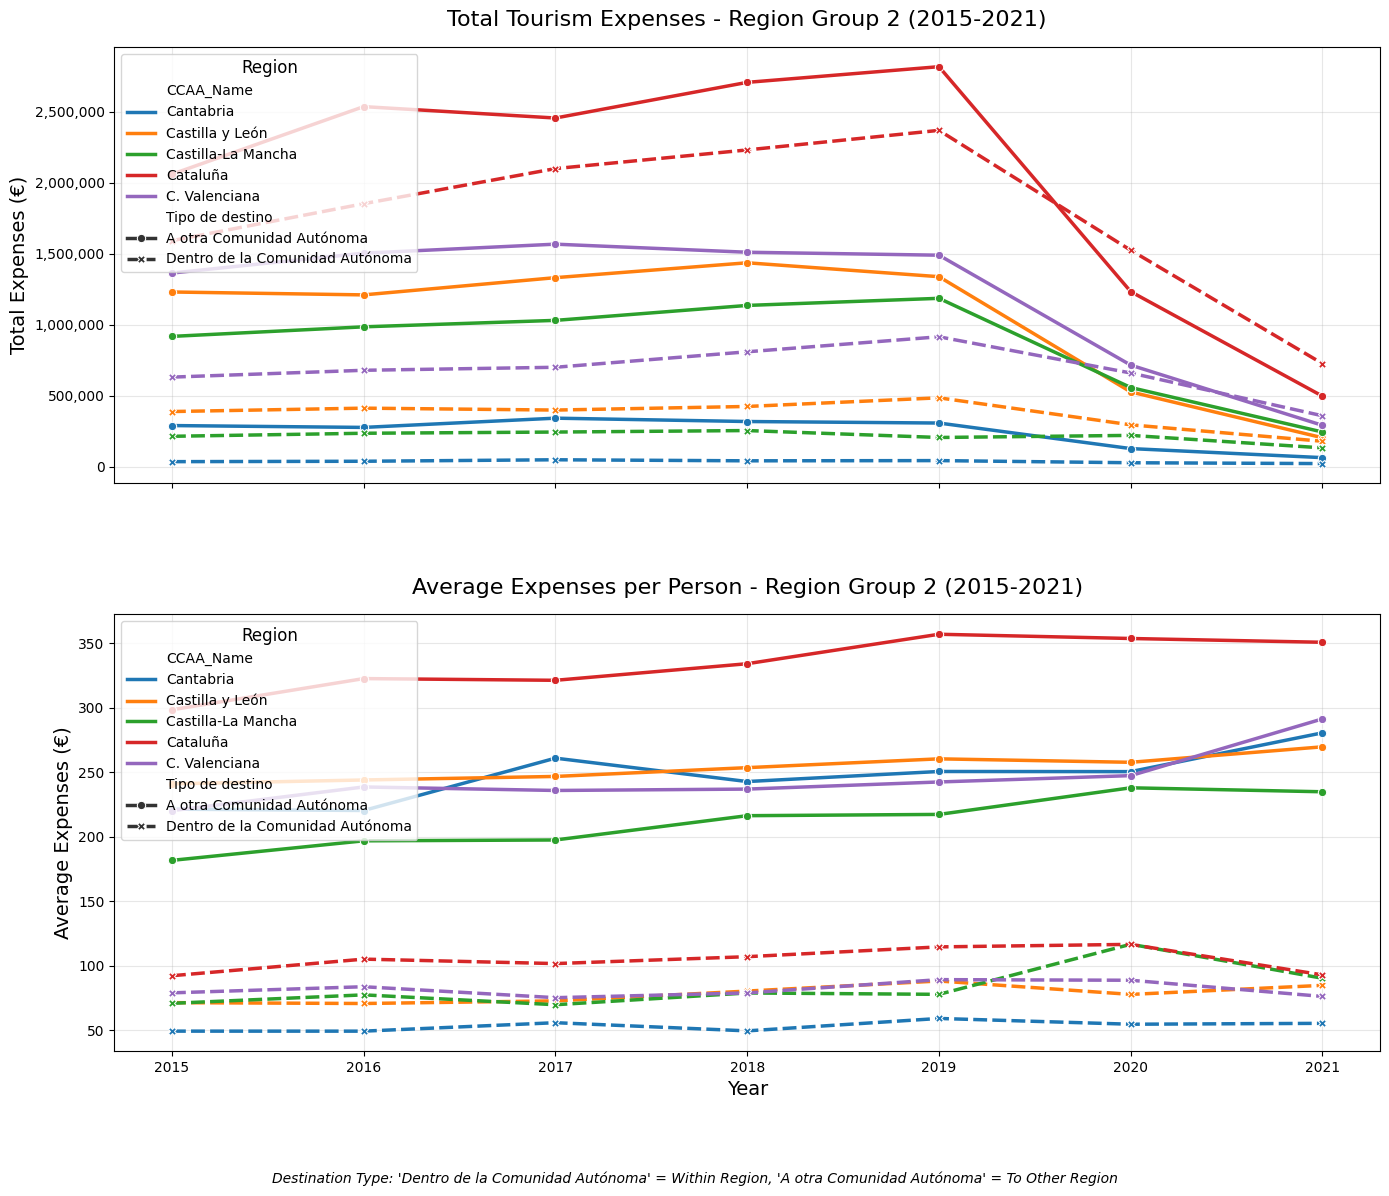

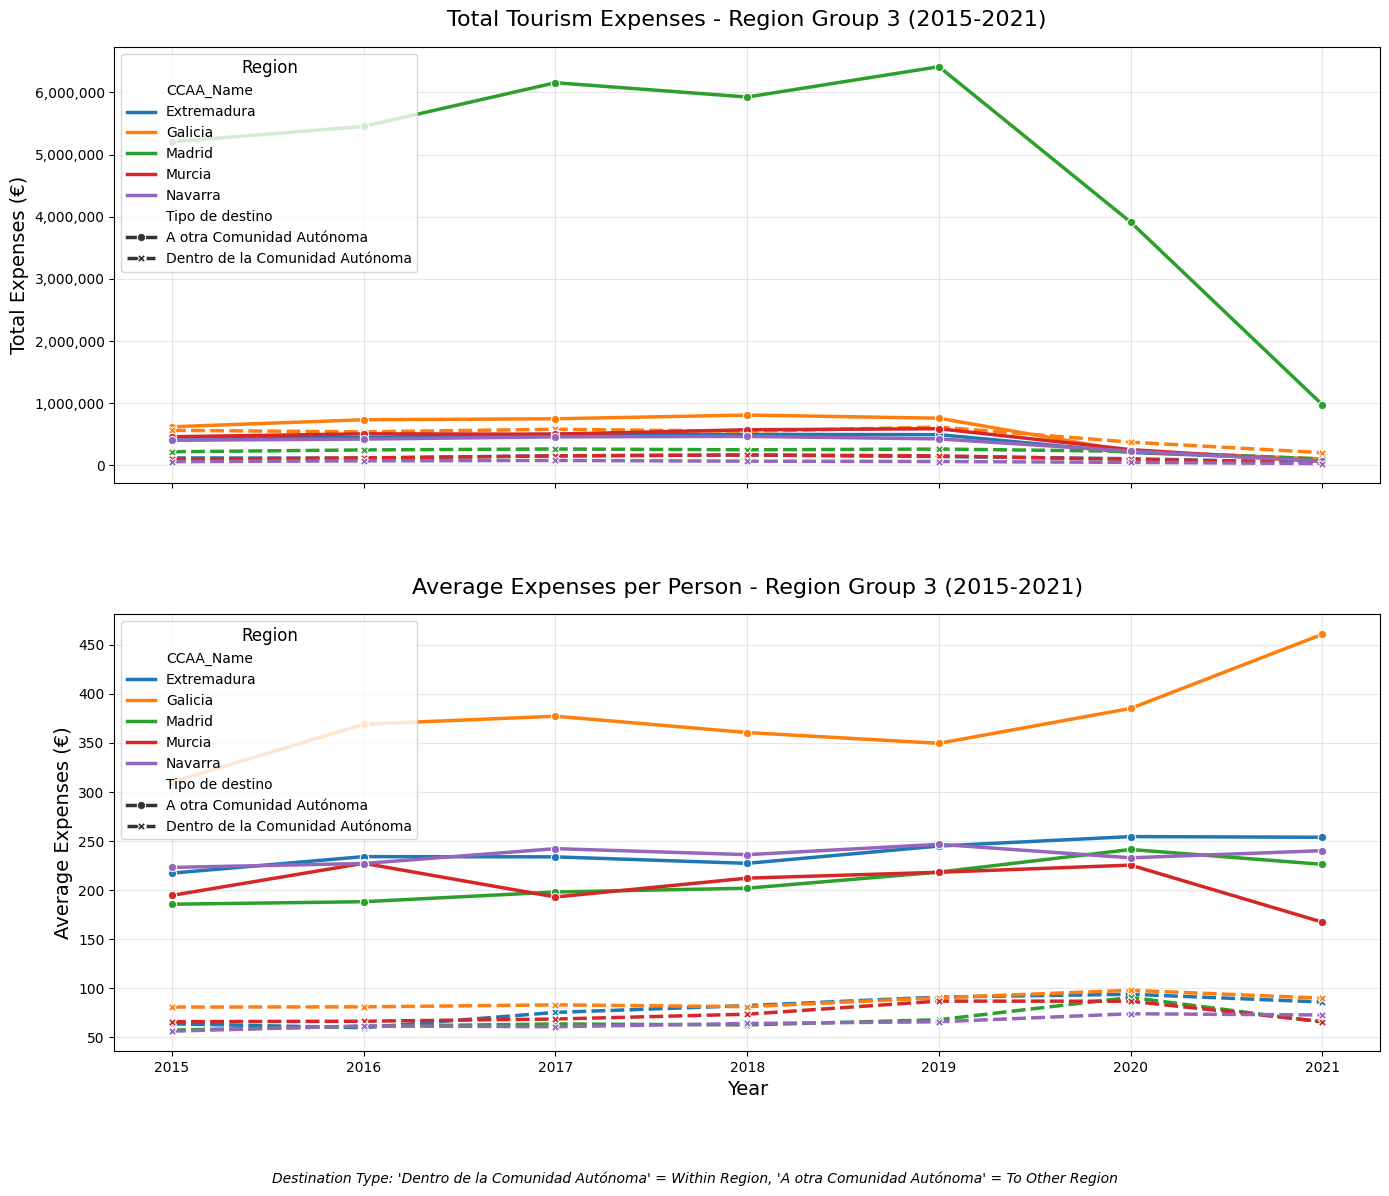

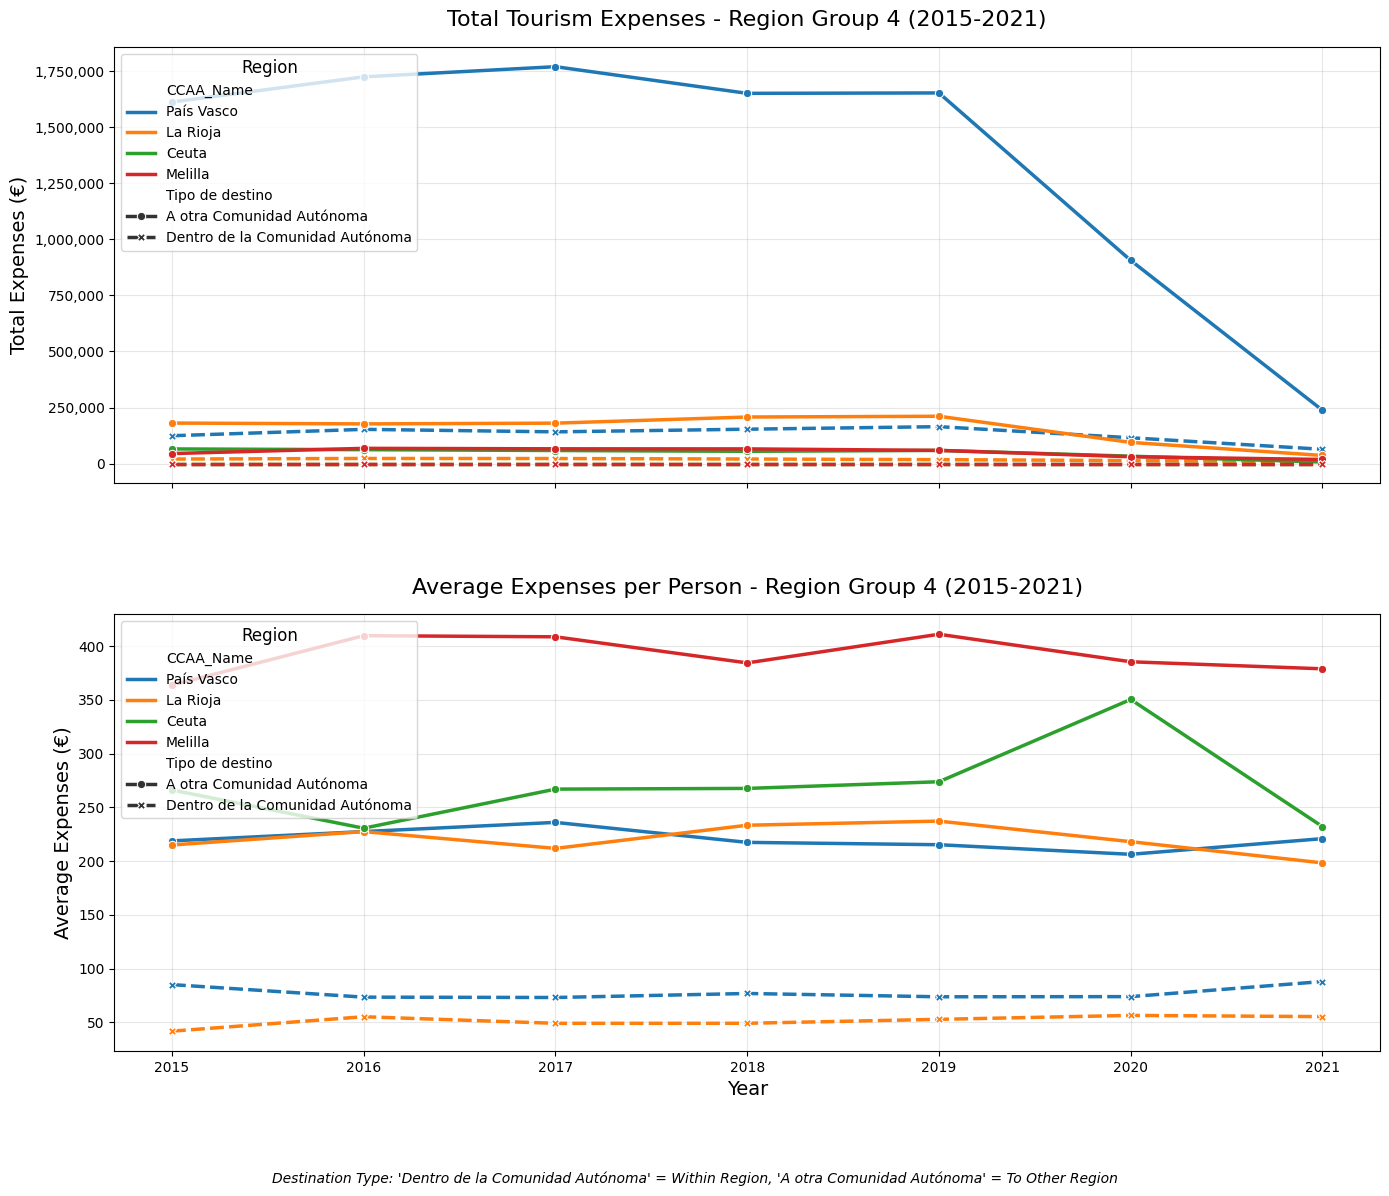

In [8]:
# --- FIRST VISUALIZATION: Tourists by Reason for Trip ---

# --- Step 1: Inspect initial dataset ---
print(tourism2.head())  # Display the first few rows for context

# --- Step 2: Filter data ---
filtered_tourism2 = tourism2[
    (tourism2['Motivo del viaje'] != 'Total') &
    (tourism2['Tipo de dato'] == 'Dato base')
]

print(filtered_tourism2)  # Verify the filtered dataset

# --- Step 3: Group data (modified to improve x-axis) ---
grouped_tourism = filtered_tourism2.groupby(['Year', 'Motivo del viaje', 'Month'])['Total'].sum().reset_index()

# Create a better date format for visualization
grouped_tourism['Date'] = pd.to_datetime(grouped_tourism['Year'].astype(str) + '-' +
                                        grouped_tourism['Month'].astype(str).str.zfill(2) + '-01')

print(grouped_tourism)  # Inspect the grouped data

# --- Step 4: Plot improved line graph ---
plt.figure(figsize=(14, 8))  # Larger figure size for better visibility

# Create line plot with proper datetime x-axis
sns.lineplot(
    data=grouped_tourism,
    x='Date',  # Use proper datetime for x-axis
    y='Total',  # Total tourists on y-axis
    hue='Motivo del viaje',  # Differentiate by reason for the trip
    marker='o',  # Add markers for better visualization
    markersize=6  # Slightly larger markers
)

# Format the x-axis to show dates more clearly
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
ax = plt.gca()
# Show only one year marker per year (fixes duplicate years)
ax.xaxis.set_major_locator(YearLocator())
# Add ticks for all months but don't label them
ax.xaxis.set_minor_locator(MonthLocator(range(1, 13)))  # Explicitly add ticks for all 12 months
ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only
# Make minor ticks visible
ax.tick_params(which='minor', length=4, color='gray', width=1)

# Customize appearance
plt.title('Variation of Number of Tourists by Reason for the Trip (2015-2021)',
          fontsize=16, pad=20)  # Improved title
plt.xlabel('Year', fontsize=14)  # Label x-axis
plt.ylabel('Number of Tourists', fontsize=14)  # Label y-axis
plt.grid(True, alpha=0.3)  # Add subtle grid

# Format y-axis with comma separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Improve legend
plt.legend(title='Reason for Trip', title_fontsize=12, fontsize=11,
           loc='upper right', framealpha=0.9)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

# --- SECOND VISUALIZATION: Expenses by CCAA ---

# --- Step 5-6: Filter and group data ---
filtered_data = tourism3[
    (tourism3['Tipo de destino'].isin(['Dentro de la Comunidad Autónoma', 'A otra Comunidad Autónoma'])) &
    (tourism3['Concepto turístico'].isin(['Gasto total', 'Gasto medio por persona'])) &
    (tourism3['Tipo de dato'] == 'Valor absoluto') &
    (~tourism3['CCAA'].isna())  # Ensure CCAA is not null
]

# Map CCAA codes to names
ccaa_map = {
    '01': 'Andalucía', '02': 'Aragón', '03': 'Asturias', '04': 'Baleares',
    '05': 'Canarias', '06': 'Cantabria', '07': 'Castilla y León', '08': 'Castilla-La Mancha',
    '09': 'Cataluña', '10': 'C. Valenciana', '11': 'Extremadura', '12': 'Galicia',
    '13': 'Madrid', '14': 'Murcia', '15': 'Navarra', '16': 'País Vasco',
    '17': 'La Rioja', '18': 'Ceuta', '19': 'Melilla'
}

# Total expenses calculation
total_expenses = filtered_data[filtered_data['Concepto turístico'] == 'Gasto total'].groupby(
    ['Year', 'CCAA', 'Tipo de destino']
).agg(
    total_expenses=('Total', 'sum')
).reset_index()

# Add CCAA names
total_expenses['CCAA_Name'] = total_expenses['CCAA'].map(ccaa_map)

# Average expenses calculation
avg_expenses = filtered_data[filtered_data['Concepto turístico'] == 'Gasto medio por persona'].groupby(
    ['Year', 'CCAA', 'Tipo de destino']
).agg(
    avg_expenses=('Total', 'mean')
).reset_index()

# Add CCAA names
avg_expenses['CCAA_Name'] = avg_expenses['CCAA'].map(ccaa_map)

# Merge total and average expenses data
expenses_data = pd.merge(total_expenses, avg_expenses,
                         on=['Year', 'CCAA', 'Tipo de destino', 'CCAA_Name'],
                         how='outer')

# --- Step 7: Plot improved expenses visualizations ---
# Instead of plotting all CCAAs at once, let's select top 5 for clarity
# Find top 5 CCAAs by total expenses
top_ccaas = expenses_data.groupby('CCAA_Name')['total_expenses'].mean().nlargest(5).index.tolist()

# Filter data for top CCAAs
top_expenses_data = expenses_data[expenses_data['CCAA_Name'].isin(top_ccaas)].copy()

# Create figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Color palette for consistency
palette = sns.color_palette("viridis", len(top_ccaas))

# --- Plot 1: Total expenses for top CCAAs ---
sns.lineplot(
    data=top_expenses_data,
    x='Year', y='total_expenses',
    hue='CCAA_Name', style='Tipo de destino',
    palette=palette, markers=True, linewidth=2.5,
    ax=axes[0]
)
axes[0].set_title('Total Tourism Expenses by Top 5 Regions (2015-2021)',
                 fontsize=16, pad=15)
axes[0].set_ylabel('Total Expenses (€)', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
axes[0].legend(title='Region', fontsize=10, title_fontsize=12)

# --- Plot 2: Average expenses for top CCAAs ---
sns.lineplot(
    data=top_expenses_data,
    x='Year', y='avg_expenses',
    hue='CCAA_Name', style='Tipo de destino',
    palette=palette, markers=True, linewidth=2.5,
    ax=axes[1]
)
axes[1].set_title('Average Expenses per Person by Top 5 Regions (2015-2021)',
                 fontsize=16, pad=15)
axes[1].set_ylabel('Average Expenses (€)', fontsize=14)
axes[1].set_xlabel('Year', fontsize=14)  # Add direct x-axis label to bottom plot
axes[1].grid(True, alpha=0.3)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
axes[1].legend(title='Region', fontsize=10, title_fontsize=12)

# Remove the shared x-axis label
# fig.text(0.5, 0.08, 'Year', ha='center', fontsize=14) - REMOVED

# Add annotation explaining the destination types
fig.text(0.5, 0.01,
         "Destination Type: 'Dentro de la Comunidad Autónoma' = Within Region, 'A otra Comunidad Autónoma' = To Other Region",
         ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.subplots_adjust(bottom=0.12, hspace=0.3)  # Adjust layout for annotation
plt.show()

# If you want to see data for all regions, create separate visualizations
# for subsets of regions (e.g., 4-5 regions per plot)
region_groups = [expenses_data['CCAA_Name'].unique()[i:i+5] for i in range(0, len(expenses_data['CCAA_Name'].unique()), 5)]

for i, regions in enumerate(region_groups):
    group_data = expenses_data[expenses_data['CCAA_Name'].isin(regions)].copy()

    fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)
    palette = sns.color_palette("tab10", len(regions))

    # Plot total expenses
    sns.lineplot(
        data=group_data,
        x='Year', y='total_expenses',
        hue='CCAA_Name', style='Tipo de destino',
        palette=palette, markers=True, linewidth=2.5,
        ax=axes[0]
    )
    axes[0].set_title(f'Total Tourism Expenses - Region Group {i+1} (2015-2021)',
                     fontsize=16, pad=15)
    axes[0].set_ylabel('Total Expenses (€)', fontsize=14)
    axes[0].grid(True, alpha=0.3)
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    axes[0].legend(title='Region', fontsize=10, title_fontsize=12, loc='upper left')

    # Plot average expenses
    sns.lineplot(
        data=group_data,
        x='Year', y='avg_expenses',
        hue='CCAA_Name', style='Tipo de destino',
        palette=palette, markers=True, linewidth=2.5,
        ax=axes[1]
    )
    axes[1].set_title(f'Average Expenses per Person - Region Group {i+1} (2015-2021)',
                     fontsize=16, pad=15)
    axes[1].set_ylabel('Average Expenses (€)', fontsize=14)
    axes[1].set_xlabel('Year', fontsize=14)  # Add direct x-axis label to bottom plot
    axes[1].grid(True, alpha=0.3)
    axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    axes[1].legend(title='Region', fontsize=10, title_fontsize=12, loc='upper left')

    # Remove the shared x-axis label
    # fig.text(0.5, 0.08, 'Year', ha='center', fontsize=14) - REMOVED

    fig.text(0.5, 0.01,
             "Destination Type: 'Dentro de la Comunidad Autónoma' = Within Region, 'A otra Comunidad Autónoma' = To Other Region",
             ha='center', fontsize=10, style='italic')

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12, hspace=0.3)
    display(plt.gcf())
    plt.close()

## Milestone 5

1. Create an interactive map with information about the number of trips, the average duration of the trips, and expenses by CCAA of residency in the year 2021. It must be a choropleth map based on the number of trips.

For this milestone, you need to create a map using the [Folium](https://python-visualization.github.io/folium/) library. You also need to download the boundaries (GeoJson) of the Spanish CCAAs. There are many resources where you can find this information, one of them is [opendatasoft](https://public.opendatasoft.com/explore/?sort=modified).

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

In [9]:
import json
import folium
import pandas as pd

geojson_file = 'georef-spain-comunidad-autonoma.geojson'

# Ensure the 'Year' is an integer
tourism4['Year'] = tourism4['Year'].astype(int)

# Load the geojson data
with open(geojson_file, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Filter for the relevant data in the year 2021
relevant_data = tourism4[(tourism4['Year'] == 2021) &
                         (tourism4['Tipo de dato'] == 'Valor absoluto')]

# Filter the data based on "Viajes", "Gasto total" and "Duración media de los viajes" in the 'Concepto turístico' column
number_of_trips_data = relevant_data[relevant_data['Concepto turístico'] == 'Viajes']
expenses_data = relevant_data[relevant_data['Concepto turístico'] == 'Gasto medio por persona']
avg_duration_data = relevant_data[relevant_data['Concepto turístico'] == 'Duración media de los viajes']

# Aggregate data by CCAA for number of trips, average duration, and expenses
agg_data = number_of_trips_data.groupby('CCAA').agg(
    number_of_trips=('Total', 'sum')  # Sum of 'Total' for the number of trips
).reset_index()

# Aggregate the 'Gasto total' data for expenses
expenses_data_agg = expenses_data.groupby('CCAA').agg(
    expenses=('Total', 'mean')  # Sum of 'Total' for expenses
).reset_index()

# Aggregate the 'Duración media de los viajes' for average duration of trips
avg_duration_agg = avg_duration_data.groupby('CCAA').agg(
    avg_duration_of_trips=('Total', 'mean')  # Mean of 'Total' for the average duration of trips
).reset_index()

# Merge the aggregated data (number of trips, expenses, and average duration)
agg_data = pd.merge(agg_data, expenses_data_agg, on='CCAA', how='left')
agg_data = pd.merge(agg_data, avg_duration_agg, on='CCAA', how='left')

for feature in geojson_data['features']:
    acom_code = feature["properties"].get("acom_code")  # Match 'acom_code' with 'CCAA'
    metric_data = agg_data[agg_data['CCAA'] == acom_code]
    feature["properties"]["number_of_trips"] = metric_data['number_of_trips'].values[0] if not metric_data.empty else 0
    feature["properties"]["expenses"] = metric_data['expenses'].values[0] if not metric_data.empty else 0
    feature["properties"]["avg_duration_of_trips"] = metric_data['avg_duration_of_trips'].values[0] if not metric_data.empty else 0


# Create the base map centered on Spain
m = folium.Map(location=[40.4168, -3.7038], zoom_start=6, tiles='CartoDB positron')

print(agg_data)

# Create the choropleth map based on the number of trips
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    name="Number of Trips",
    data=agg_data,
    columns=["CCAA", "number_of_trips"],
    key_on="feature.properties.acom_code",  # Assuming 'acom_code' in GeoJSON corresponds to 'CCAA'
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(m)

labels = folium.GeoJson(
    geojson_data,
    style_function=lambda x: {
        "fillColor": "#ffffff",
        "color": "#000000",
        "fillOpacity": 0.1,
        "weight": 0.1,
    },
    highlight_function=lambda x: {
        "fillColor": "#000000",
        "color": "#000000",
        "fillOpacity": 0.5,
        "weight": 0.1,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["acom_name", "number_of_trips", "expenses", "avg_duration_of_trips"],
        aliases=["CCAA: ", "Number of Trips: ", "Expenses (€): ", "Avg. Duration (Days): "],
        style=(
            "background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"
        ),
        sticky=True,
    ),
)
m.add_child(labels)

m.add_child(choropleth)

m

from google.colab import files
m.save("spain_tourism_map.html")
files.download("spain_tourism_map.html")


   CCAA  number_of_trips  expenses  avg_duration_of_trips
0    01        7640161.0   141.045                  3.010
1    02        1529287.0   128.560                  2.770
2    03        1055799.0   199.310                  3.555
3    04        1277310.0   176.335                  3.550
4    05        2071134.0   158.630                  3.105
5    06         599696.0   151.955                  2.735
6    07        2983582.0   148.465                  2.945
7    08        2513602.0   155.880                  2.865
8    09        9239852.0   157.620                  3.050
9    10        5815555.0   129.325                  3.130
10   11         911801.0   157.520                  2.960
11   12        2638328.0   144.535                  2.700
12   13        6701830.0   190.265                  3.830
13   14        1244975.0   123.330                  2.575
14   15         706300.0   156.470                  2.980
15   16        2130738.0   164.245                  3.275
16   17       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import json
import pandas as pd

# Predefined coordinates for Spanish Autonomous Communities
SPAIN_CCAA_COORDINATES = {
    "Andalucía": (37.6, -4.5),
    "Aragón": (41.5, -1.0),
    "Asturias": (43.3, -5.8),
    "Baleares": (39.6, 2.9),
    "Canarias": (28.5, -15.9),
    "Cantabria": (43.2, -3.8),
    "Castilla-La Mancha": (39.5, -3.0),
    "Castilla y León": (41.6, -4.8),
    "Cataluña": (41.8, 1.8),
    "Comunidad Valenciana": (39.5, -0.7),
    "Extremadura": (39.5, -6.0),
    "Galicia": (42.7, -7.8),
    "Madrid": (40.4, -3.7),
    "Murcia": (38.0, -1.1),
    "Navarra": (42.7, -1.6),
    "País Vasco": (43.0, -2.5),
    "La Rioja": (42.3, -2.5),
    "Ceuta": (35.9, -5.3),
    "Melilla": (35.3, -2.9)
}

def generate_enhanced_files(original_geojson_path, geojson_output_path, json_output_path, csv_output_path):
    # Load the original GeoJSON file
    with open(original_geojson_path, 'r', encoding='utf-8') as f:
        geojson_data = json.load(f)

    # Ensure the 'Year' is an integer
    tourism4['Year'] = tourism4['Year'].astype(int)

    # Filter for the relevant data in the year 2021
    relevant_data = tourism4[(tourism4['Year'] == 2021) &
                             (tourism4['Tipo de dato'] == 'Valor absoluto')]

    # Prepare aggregated data for each metric
    def aggregate_metric(concept):
        return relevant_data[relevant_data['Concepto turístico'] == concept].groupby('CCAA').agg(
            total=('Total', 'mean')
        ).reset_index()

    # Aggregate different metrics
    trips_data = aggregate_metric('Viajes')
    expenses_data = aggregate_metric('Gasto medio por persona')
    duration_data = aggregate_metric('Duración media de los viajes')

    # Prepare CSV data
    csv_data = []

    # Aggregate and process data
    for ccaa_name, (latitude, longitude) in SPAIN_CCAA_COORDINATES.items():
        # Find corresponding metrics
        trips = trips_data[trips_data['CCAA'] == ccaa_name]['total'].values
        expenses = expenses_data[expenses_data['CCAA'] == ccaa_name]['total'].values
        duration = duration_data[duration_data['CCAA'] == ccaa_name]['total'].values

        # Prepare row
        csv_row = {
            "Autonomous_Community": ccaa_name,
            "Latitude": latitude,
            "Longitude": longitude,
            "Number_of_Trips": trips[0] if len(trips) > 0 else 0,
            "Average_Expenses_Per_Person": expenses[0] if len(expenses) > 0 else 0,
            "Average_Trip_Duration": duration[0] if len(duration) > 0 else 0
        }
        csv_data.append(csv_row)

    # Convert to DataFrame and save
    csv_df = pd.DataFrame(csv_data)
    csv_df.to_csv(csv_output_path, index=False)

    print(f"CSV with coordinates saved to {csv_output_path}")

    return csv_df

# Usage
original_geojson = 'georef-spain-comunidad-autonoma.geojson'
csv_output = 'spain_tourism_2021_coordinates.csv'
csv_data = generate_enhanced_files(original_geojson, None, None, csv_output)

# Display the data
print(csv_data)

CSV with coordinates saved to spain_tourism_2021_coordinates.csv
    Autonomous_Community  Latitude  Longitude  Number_of_Trips  \
0              Andalucía      37.6       -4.5                0   
1                 Aragón      41.5       -1.0                0   
2               Asturias      43.3       -5.8                0   
3               Baleares      39.6        2.9                0   
4               Canarias      28.5      -15.9                0   
5              Cantabria      43.2       -3.8                0   
6     Castilla-La Mancha      39.5       -3.0                0   
7        Castilla y León      41.6       -4.8                0   
8               Cataluña      41.8        1.8                0   
9   Comunidad Valenciana      39.5       -0.7                0   
10           Extremadura      39.5       -6.0                0   
11               Galicia      42.7       -7.8                0   
12                Madrid      40.4       -3.7                0   
13         

## Milestone 6

** **This milestone does not count for grade.** **

Save and store the datasets processed for use them in  Lab2: Google Data Studio.


In [11]:
agg_data.to_excel('processed_tourism_data.xls', index=False, engine='openpyxl')
expenses_data.to_excel('processed_expenses_data.xls', index=False, engine='openpyxl')
grouped_tourism.to_excel('processed_grouped_tourism_data.xls', index=False, engine='openpyxl')
tourists_by_year_ccaa.to_excel('processed_tourists_by_year_ccaa.xls', index=False, engine='openpyxl')
tourism_by_year_sex.to_excel('processed_tourism_by_year_sex.xls', index=False, engine='openpyxl')
filtered_employment2.to_excel('processed_filtered_employment2.xls', index=False, engine='openpyxl')
filtered_employment1.to_excel('processed_filtered_employment1.xls', index=False, engine='openpyxl')

# Lab2: Google Data Studio


## 0. Lab Preparation

1.  Study and have clear the concepts explained in the theoretical class and the introductory lab.

2.   Gain experience with the use of [Google Data Studio](https://datastudio.google.com/). The goals of this lab will be mainly based on the utilization of this tool to create a dashboard.


## 1. Lab Introduction

* In this lab, we will use the dataset of the previous lab for visualization using [Google Data Studio](https://datastudio.google.com/).

* The lab will be done in groups of 3 people.

* The lab defines a set of guidelines the students must acomplish.

* **The grade will depend directly on the final result of your dashboard. Make it as visual as possible!**

* **Each group should also share their dashboard with the professor upon the finalization of the lab.**


## 2. Lab guidelines

For this practice, you have to use **Google Data Studio**. The style to use is free. The clearer and more visual your dashboard is, the better will be the grade.

Your dashboard must have at least the following elements:

1. A highlight box with total results.
2. A chart with a time series.
3. A pie chart.
4. A bar chart.
5. A table summarizing results.
6. A map that represents the data by CCAAs.

As you can see, the instructions are open-ended. You just have to represent the data in a meaningful way.
You will see that the processing we have done in the first lab is helpful for this part. In case you need to do some extra processing or modification of the data, you must do it in Python in this notebook, and it must be reflected and explained here.


---



To upload your dashboard to AG, click on Share -> Download as PDF -> Add a link back to the report. That will generate a PDF that you have to upload to AG.

Apart from that, for those taking the course remotely, I need you to invite me to your Data Studio project. (Share -> Invite people -> Add people), and to send a word document explaining how you build the dashboard.

In [12]:
# Google Data Studio dashboard in separate link